# <MSDE_DOI:>
## Less may be more: an informed reflection on molecular descriptors for drug design and discovery
### Trent Barnard, Harry Hagan, Steven Tseng and Gabriele C. Sosso

In [1]:
from PYTHON.packs import *

Using TensorFlow backend.
/home/chem/mssnkt/anaconda3/envs/graphs/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Datasets

### Lipophilicity

In [2]:
# Liphophilicity dataset
df_lipo = pd.read_csv('./DATASETS/lipophilicity.csv')
del df_lipo['CMPD_CHEMBLID']
columnsTitles = ["smiles","exp"]
df_lipo = df_lipo.reindex(columns=columnsTitles)
df_lipo.columns = ['Smiles', 'Lipophilicity'] #  Liphophilicty => [LogD at pH 7.4]

In [3]:
# Convert the Smiles into the rdkit format, and add hydrogens as well
df_lipo_mol = cf.SMILES2MOLES(df_lipo.Smiles[:])
df_lipo_mol_H = cf.ADDH_MOLES(df_lipo_mol[:])

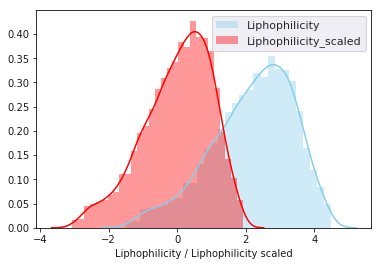

In [4]:
# Standardising the output space
ss = StandardScaler()
Liphophilicity_scaled = ss.fit_transform(np.array(df_lipo['Lipophilicity']).reshape(-1,1))
lipo_ss=ss

# Add standardised output space to dataframe 
df_lipo['Lipophilicity_scaled'] = Liphophilicity_scaled

# Let's have a look...
sns.distplot(df_lipo["Lipophilicity"] , color="skyblue", label="Liphophilicity")
sns.distplot(df_lipo["Lipophilicity_scaled"] , color="red", label="Liphophilicity_scaled")
sns.set(font_scale=1.0)
plt.xlabel("Liphophilicity / Liphophilicity scaled")
plt.legend()
plt.show()

### Amorphous drugs

In [5]:
# Amorphous (amo) dataset
df_amo = pd.read_csv('./DATASETS/amorphous.csv')
df_amo = df_amo.drop(["Compound", "MW", "Tm","Solubility"], axis=1)
df_amo.columns = ['Smiles', 'tg'] # Glass transition temperature of the amorphous phase [K]

In [6]:
# Removing problematic molecule (NaN)
df_amo = df_amo.drop(df_amo.index[52])

In [7]:
# Convert the Smiles into the rdkit format, and add hydrogens as well
df_amo_mol = cf.SMILES2MOLES(df_amo.Smiles[:])
df_amo_mol_H = cf.ADDH_MOLES(df_amo_mol[:])

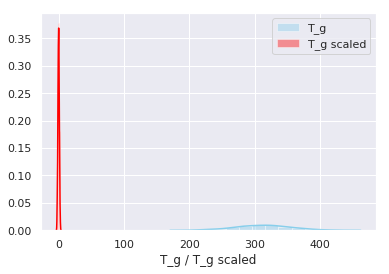

In [8]:
# Standardising the output space
amo_ss = StandardScaler()
tg_scaled = amo_ss.fit_transform(np.array(df_amo['tg']).reshape(-1,1))

# Add standardised output space to dataframe 
df_amo['tg_scaled'] = tg_scaled

# Let's have a look...
sns.distplot( df_amo["tg"] , color="skyblue", label="T_g")
sns.distplot( df_amo["tg_scaled"] , color="red", label="T_g scaled")
sns.set(font_scale=1.0)
plt.xlabel("T_g / T_g scaled")
plt.legend()
plt.show()

## Descriptors 

### Standard (from rdKit) descriptors

#### Lipophilicity 

In [9]:
# # Molecule 1646 does not make much sense!
# # I came across this one when trying to build 3D descriptors... and failed
# nonsense = df_lipo_mol_H[1646]
# Draw.MolToImage(nonsense)

In [10]:
# t3DMOLES(nonsense)
# UFFSS(nonsense)
# Draw.MolToImage(nonsense)RF_MSE(lipo_cd_scaled_splits,lipaconda3/⁨envs//⁨CompChemistry/⁨lib/⁨python3.6⁩/⁨site-packages⁩')o_RFpredTR,lipo_RFpredTE,lipo_ss)

In [11]:
# # # Getting rid of the nonsense...
# df_lipo_mol_H = np.delete(df_lipo_mol_H,1646)

In [12]:
# # Create 3D conformers - max_iter for UFF optimisation hardcoded to 1000 (to be on the safe side...)
# t3DMOLES(df_lipo_mol_H);
# UFFSS(df_lipo_mol_H);

In [13]:
# # Throwing ~ 90 STD at it...
# D_std_lipo = STDD(df_lipo_mol_H);

In [14]:
# Save these descriptors to save some time...
# pickle.dump(D_std_lipo, open("./DESCRIPTORS/D_std_lipo.pkl", "wb"))

# Load the standard descriptors computed above - if any!
D_std_lipo = pickle.load( open( "./DESCRIPTORS/D_std_lipo.pkl", "rb" ) )

# Putting standard descriptors into a dataframe 
df_lipo_SD = pd.DataFrame(data=D_std_lipo, columns = [x for x in range(len(D_std_lipo[0]))])
df_lipo_SD = df_lipo_SD.loc[[x for x in df_lipo_SD.index if x != 1646]]

df_lipo_SD[df_lipo_SD.isnull().any(axis=1)]; # 1561 has a NaN !!
df_lipo_SD = df_lipo_SD.fillna(0);

# Getting new ouptuts
df_lipo_std_outputs = df_lipo.loc[[x for x in df_lipo.index if x != 1646]]

# Normalising the input space 
scaler = MinMaxScaler(feature_range=(0,1))
df_lipo_SD.loc[:,:] = scaler.fit_transform(df_lipo_SD.loc[:,:])
# df_lipo_SD.head()

#### Amorphous 

In [15]:
# # Create 3D conformers - max_iter for UFF optimisation hardcoded to 1000 (to be on the safe side...)
# t3DMOLES(df_amo_mol_H);
# UFFSS(df_amo_mol_H);

In [16]:
# # Throwing ~ 90 STD at it...
# D_std_amo = STDD(df_amo_mol_H);

In [17]:
# # Save these descriptors to save some time...
# pickle.dump(D_std_amo, open("./DESCRIPTORS/D_std_amo.pkl", "wb"))

# Load the standard descriptors computed above - if any!
D_std_amo = pickle.load( open( "./DESCRIPTORS/D_std_amo.pkl", "rb" ) )

# Putting standard descriptors into a dataframe 
df_amo_SD = pd.DataFrame(data=D_std_amo, columns = [x for x in range(len(D_std_amo[0]))])

# Normalising the input space 
scaler = MinMaxScaler(feature_range=(0,1))
df_amo_SD.loc[:,:] = scaler.fit_transform(df_amo_SD.loc[:,:])

### Cliques

#### Lipophilicity 

In [18]:
# # Generate the cliques
#clique_decomposition_lipo, vocabl_lipo = get_clique_decomposition(df_lipo['Smiles'])

# # Save these descriptors to save some time...
#pickle.dump(clique_decomposition_lipo, open("./DESCRIPTORS/clique_decomposition_lipo.pkl", "wb"))

# # Save the length of vocabl_lipo as well, we need that to fille the dataframe below
#pickle.dump(vocabl_lipo, open("./DESCRIPTORS/vocabl_lipo.pkl", "wb"))

# Load the cliques descriptors computed above
clique_decomposition_lipo = pickle.load( open( "./DESCRIPTORS/clique_decomposition_lipo.pkl", "rb" ) )

# Load the length of vocabl_lipo as well, computed above
vocabl_lipo = pickle.load( open( "./DESCRIPTORS/vocabl_lipo.pkl", "rb" ) )

# Normalising the input space for scaled cliques descriptor 
scaler = MinMaxScaler(feature_range=(0,1))
clique_decomposition_lipo_scaled = pd.DataFrame(scaler.fit_transform(clique_decomposition_lipo.loc[:,:]))

#### Amorphous

In [19]:
# ## Amorphous Clique Decomposition Unscaled
# clique_decomposition_amo, vocabl_amo = get_clique_decomposition(df_amo['Smiles'])

# # Save these descriptors to save some time...
# pickle.dump(clique_decomposition_amo, open("./DESCRIPTORS/clique_decomposition_amo.pkl", "wb"))

# # Save the length of vocabl_amo as well, we need that to fille the dataframe below
# pickle.dump(vocabl_amo, open("./DESCRIPTORS/vocabl_amo.pkl", "wb"))

# Load the cliques descriptors computed above
clique_decomposition_amo = pickle.load( open( "./DESCRIPTORS/clique_decomposition_amo.pkl", "rb" ) )

# Load the length of vocabl_amo as well, computed above
vocabl_amo = pickle.load( open( "./DESCRIPTORS/vocabl_amo.pkl", "rb" ) )

# Normalising the input space for scaled cliques descriptors
scaler = MinMaxScaler(feature_range=(0,1))
clique_decomposition_amo_scaled = pd.DataFrame(scaler.fit_transform(clique_decomposition_amo.loc[:,:]))

### wACSFs

#### Lipophilicity 

In [20]:
### lipophilicity wACSFs
wacsfs_lipo = pickle.load(open('./DESCRIPTORS/lipoWACSF.pkl','rb')) # Loading the descriptor

wacsfs_lipo
wacsfs_lipo.drop(['CMPD_CHEMBLID','exp','smiles'],axis=1,inplace=True)

# Normalising inputs
scaler = MinMaxScaler(feature_range=(0,1))
wacsfs_lipo= pd.DataFrame(scaler.fit_transform(wacsfs_lipo.loc[:,:]))


#### Amorphous

In [21]:
wacsfs_amo = pd.read_csv('./DESCRIPTORS/Amo_22_10_7_2_12.csv')
wacsfs_amo.drop(['SMILES','Compound','MW','Tm','Tg','Solubility'],axis=1,inplace=True)
wacsfs_amo = wacsfs_amo.drop(df_amo.index[52])
# Normalising inputs
scaler = MinMaxScaler(feature_range=(0,1))
wacsfs_amo = pd.DataFrame(scaler.fit_transform(wacsfs_amo.loc[:,:]))

## Generating Train-Test Splits for Cross Validation

In [22]:
# Defining the KFold
kf = RepeatedKFold(n_splits=5,n_repeats=1,random_state = 10)

In [23]:
clique_decomposition_lipo_scaled15=pickle.load(open('./DESCRIPTORS/clique_decomposition_lipo_scaled15.pkl','rb'))
clique_decomposition_lipo_scaled40=pickle.load(open('./DESCRIPTORS/clique_decomposition_lipo_scaled40.pkl','rb'))
clique_decomposition_amo_scaled6=pickle.load(open('./DESCRIPTORS/clique_decomposition_amo_scaled5.pkl','rb'))
clique_decomposition_amo_scaled13=pickle.load(open('./DESCRIPTORS/clique_decomposition_amo_scaled18.pkl','rb'))

### Standard (from rdKit) descriptors

#### Lipophilicity 

In [24]:
lipo_sd_splits = get_train_test_splits(df_lipo_SD,df_lipo_std_outputs['Lipophilicity_scaled'],kf)

ValueError: Found input variables with inconsistent numbers of samples: [4199, 4198]

#### Amorphous

In [25]:
amo_sd_splits = get_train_test_splits(df_amo_SD, df_amo['tg_scaled'],kf)

### Cliques

#### Lipophilicity ALL

In [26]:
lipo_cd_scaled_splits = get_train_test_splits(clique_decomposition_lipo_scaled,df_lipo['Lipophilicity_scaled'],kf)

ValueError: Found input variables with inconsistent numbers of samples: [4200, 4199]

#### Lipophilicity 15

In [27]:
lipo_cd_scaled_splits15 = get_train_test_splits(clique_decomposition_lipo_scaled15,df_lipo['Lipophilicity_scaled'],kf)

ValueError: Found input variables with inconsistent numbers of samples: [4200, 4199]

#### Lipophilicity 40

In [28]:
lipo_cd_scaled_splits40 = get_train_test_splits(clique_decomposition_lipo_scaled40,df_lipo['Lipophilicity_scaled'],kf)

ValueError: Found input variables with inconsistent numbers of samples: [4200, 4199]

#### Amorphous ALL

In [29]:
amo_cd_scaled_splits = get_train_test_splits(clique_decomposition_amo_scaled,df_amo['tg_scaled'],kf)

#### Amorphous 6

In [30]:
amo_cd_scaled_splits6 = get_train_test_splits(clique_decomposition_amo_scaled6,df_amo['tg_scaled'],kf)

#### Amorphous 13

In [31]:
amo_cd_scaled_splits13 = get_train_test_splits(clique_decomposition_amo_scaled13,df_amo['tg_scaled'],kf)

### wACSFs

#### Lipophilicity 

In [32]:
lipo_wacsfs_splits = get_train_test_splits(wacsfs_lipo,df_lipo['Lipophilicity_scaled'],kf)

#### Amorphous 

In [33]:
amo_wacsfs_splits = get_train_test_splits(wacsfs_amo, df_amo['tg_scaled'],kf)

## Optimisation of NN models for each dataset / descriptor

In [34]:
# Define parameters to optimise over
architectures = [[10],[10,10],[10,10,10],[50],[50,50],[50,50,50],[75],[75,75],[75,75,75]]
activation = ['relu','tanh','softmax','elu','selu','softplus','softsign','sigmoid']
optimiser = ['rmsprop','sgd','adagrad','adam']
epochs = [300]

param_grid = dict(architecture=architectures,activation=activation,optimiser=optimiser,epochs=epochs)

### Standard (from rdKit) descriptors

#### Lipophilicity 

In [35]:
# # GridSearchCVLipophilicityStandardDescriptors = GridSearchCVKeras(lipo_sd_splits['xtrain'],lipo_sd_splits['xtest'],
# #                                       lipo_sd_splits['ytrain'],lipo_sd_splits['ytest'], param_grid=param_grid)
# # pickle.dump(GridSearchCVLipophilicityStandardDescriptors, 
# #             open("./RESULTS/GridSearchCVLipophilicityStandardDescriptorsRAW.pkl", "wb"))

GridSearchCVLipophilicityStandardDescriptors = pd.DataFrame(pickle.load(
    open( "./RESULTS/LipophilicityStandardDescriptorsBestModel.pickle", "rb" ) ) )

#lipo_sd_worked_up = work_up(GridSearchCVLipophilicityStandardDescriptors)

### Standard (from rdKit) descriptors (2) with 3D descriptors

#### Lipophilicity 

In [36]:
# GridSearchCVLipophilicityStandardDescriptors2 = GridSearchCVKeras(lipo_sd_splits['xtrain'],lipo_sd_splits['xtest'],
#                                        lipo_sd_splits['ytrain'],lipo_sd_splits['ytest'], param_grid=param_grid)
# pickle.dump(GridSearchCVLipophilicityStandardDescriptors2, 
#             open("./RESULTS/GridSearchCVLipophilicityStandardDescriptors2RAW.pkl", "wb"))

GridSearchCVLipophilicityStandardDescriptors = pd.DataFrame(pickle.load(
    open( "./RESULTS/LipophilicityStandardDescriptors2BestModel.pickle", "rb" ) ) )

#lipo_sd_worked_up = work_up(GridSearchCVLipophilicityStandardDescriptors)
GridSearchCVLipophilicityStandardDescriptors.rename(columns={'epochs':'epoch'},inplace=True)

#### Amorphous

In [37]:
#GridSearchCVAmorphousStandardDescriptors = GridSearchCVKeras(amo_sd_splits['xtrain'],amo_sd_splits['xtest'],
#                                       amo_sd_splits['ytrain'],amo_sd_splits['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVAmorphousStandardDescriptors, 
#             open("./RESULTS/GridSearchCVAmorphousStandardDescriptorsRAW.pkl", "wb"))
     
GridSearchCVAmorphousStandardDescriptors = pd.DataFrame(pickle.load(
    open( "./RESULTS/AmorphousStandardDescriptorsBestModel.pkl", "rb" ) ) )

#hep_sd_worked_up = work_up(GridSearchCVHepatocytesStandardDescriptors)
GridSearchCVAmorphousStandardDescriptors.rename(columns={'epochs':'epoch'},inplace=True)

### Cliques FULL

#### Lipophilicity 

In [38]:
# GridSearchCVLipophilicityCliquesScaled = GridSearchCVKeras(lipo_cd_scaled_splits['xtrain'],lipo_cd_scaled_splits['xtest'],
#                                       lipo_cd_scaled_splits['ytrain'],lipo_cd_scaled_splits['ytest'], param_grid=param_grid)
# pickle.dump(GridSearchCVLipophilicityCliquesScaled, 
#             open("./RESULTS/GridSearchCVLipophilicityCliquesScaledRAW.pkl", "wb"))

GridSearchCVLipophilicityCliquesScaled = pd.DataFrame(pickle.load(
    open( "./RESULTS/LipophilicityCliquesScaledBestModel.pickle", "rb" ) ) )

#lipo_cd_scaled_worked_up = work_up(GridSearchCVLipophilicityCliquesScaled)

#### Lipophilicity 15

In [39]:
#GridSearchCVLipophilicityCliquesScaled15 = GridSearchCVKeras(lipo_cd_scaled_splits15['xtrain'],
#     lipo_cd_scaled_splits15['xtest'],lipo_cd_scaled_splits15['ytrain'],
#                    lipo_cd_scaled_splits15['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVLipophilicityCliquesScaled15, 
#             open("./RESULTS/GridSearchCVLipophilicityCliquesScaledRAW15.pkl", "wb"))
#
GridSearchCVLipophilicityCliquesScaled15 = pd.DataFrame(pickle.load(
    open( "./RESULTS/LipophilicityCliquesScaledBestModel15.pkl", "rb" ) ) )

#hep_cd_scaled_worked_up = work_up(GridSearchCVHepatocytesCliquesScaled)
GridSearchCVLipophilicityCliquesScaled15.rename(columns={'epochs':'epoch'},inplace=True)

##### Lipophilcity 40 

In [40]:
#GridSearchCVLipophilicityCliquesScaled40 = GridSearchCVKeras(lipo_cd_scaled_splits40['xtrain'],
#                    lipo_cd_scaled_splits40['xtest'],lipo_cd_scaled_splits40['ytrain'],
#                    lipo_cd_scaled_splits40['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVLipophilicityCliquesScaled40, 
#             open("./RESULTS/GridSearchCVLipophilicityCliquesScaledRAW40.pkl", "wb"))
#
GridSearchCVLipophilicityCliquesScaled40 = pd.DataFrame(pickle.load(
    open( "./RESULTS/LipophilicityCliquesScaledBestModel40.pkl", "rb" ) ) )

#hep_cd_scaled_worked_up = work_up(GridSearchCVHepatocytesCliquesScaled)
GridSearchCVLipophilicityCliquesScaled40.rename(columns={'epochs':'epoch'},inplace=True)

#### Amorphous ALL

In [41]:
#GridSearchCVAmorphousCliquesScaled = GridSearchCVKeras(amo_cd_scaled_splits['xtrain'],amo_cd_scaled_splits['xtest'],
#                                       amo_cd_scaled_splits['ytrain'],amo_cd_scaled_splits['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVAmorphousCliquesScaled, 
#             open("./RESULTS/GridSearchCVAmorphousCliquesScaledRAW.pkl", "wb"))
     
GridSearchCVAmorphousCliquesScaled = pd.DataFrame(pickle.load(
    open( "./RESULTS/AmorphousCliquesScaledBestModel.pkl", "rb" ) ) )

#hep_sd_worked_up = work_up(GridSearchCVHepatocytesStandardDescriptors)
GridSearchCVAmorphousCliquesScaled.rename(columns={'epochs':'epoch'},inplace=True)

#### Amorphous 6

In [42]:
#GridSearchCVAmorphousCliquesScaled6 = GridSearchCVKeras(amo_cd_scaled_splits6['xtrain'],amo_cd_scaled_splits6['xtest'],
#                                       amo_cd_scaled_splits6['ytrain'],amo_cd_scaled_splits6['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVAmorphousCliquesScaled6, 
#             open("./RESULTS/GridSearchCVAmorphousCliquesScaledRAW6.pkl", "wb"))
     
GridSearchCVAmorphousCliquesScaled6 = pd.DataFrame(pickle.load(
    open( "./RESULTS/AmorphousCliquesScaledBestModel6.pkl", "rb" ) ) )

#hep_sd_worked_up = work_up(GridSearchCVHepatocytesStandardDescriptors)
GridSearchCVAmorphousCliquesScaled6.rename(columns={'epochs':'epoch'},inplace=True)

#### Amorphous 13

In [43]:
#GridSearchCVAmorphousCliquesScaled13 = GridSearchCVKeras(amo_cd_scaled_splits13['xtrain'],amo_cd_scaled_splits13['xtest'],
#                                       amo_cd_scaled_splits13['ytrain'],amo_cd_scaled_splits13['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVAmorphousCliquesScaled13, 
#             open("./RESULTS/GridSearchCVAmorphousCliquesScaledRAW13.pkl", "wb"))
     
GridSearchCVAmorphousCliquesScaled13 = pd.DataFrame(pickle.load(
    open( "./RESULTS/AmorphousCliquesScaledBestModel13.pkl", "rb" ) ) )

#hep_sd_worked_up = work_up(GridSearchCVHepatocytesStandardDescriptors)
GridSearchCVAmorphousCliquesScaled13.rename(columns={'epochs':'epoch'},inplace=True)

### wACSFs

#### Lipophilicity 

In [44]:
# GridSearchCVLipophilicityWACSFS = GridSearchCVKeras(lipo_wacsfs_splits['xtrain'],lipo_wacsfs_splits['xtest'],
#                                       lipo_wacsfs_splits['ytrain'],lipo_wacsfs_splits['ytest'], param_grid=param_grid)
# pickle.dump(GridSearchCVLipophilicityWACSFS, 
#            open("../../../GridSearchCVLipophilicityWACSFSRAW.pkl", "wb"))

GridSearchCVLipophilicityWACSFS = pd.DataFrame(pickle.load( 
    open("./RESULTS/LipophilicityWACSFSBestModel.pickle", "rb")))

#lipo_wacsf_worked_up = work_up(GridSearchCVLipophilicityWACSFS)
GridSearchCVLipophilicityWACSFS.rename(columns={'epochs':'epoch'},inplace=True)

#### Amorphous

In [45]:
#GridSearchCVAmorphousWACSFS = GridSearchCVKeras(amo_wacsfs_splits['xtrain'],amo_wacsfs_splits['xtest'],
#                                       amo_wacsfs_splits['ytrain'],amo_wacsfs_splits['ytest'], param_grid=param_grid)
#pickle.dump(GridSearchCVAmorphousWACSFS, 
#             open("./RESULTS/GridSearchCVAmorphousWACSFSRAW.pkl", "wb"))
     
GridSearchCVAmorphousWACSFS = pd.DataFrame(pickle.load(
    open( "./RESULTS/AmorphousWACSFSBestModel.pkl", "rb" ) ) )

#hep_sd_worked_up = work_up(GridSearchCVHepatocytesStandardDescriptors)
GridSearchCVAmorphousWACSFS.rename(columns={'epochs':'epoch'},inplace=True)

## Cross-validated results for the optimised NN

## Getting predictions for the 5 splits using the best model for each dataset/descriptor combination

### Standard Descriptors

#### Lipophilciity

In [46]:
#lipo_sd_preds = make_predictions(unscaled_output = df_lipo["Lipophilicity"], 
#                 splits=lipo_sd_splits , best_model_results=GridSearchCVLipophilicityStandardDescriptors,
#                                        scaler=StandardScaler())
#pickle.dump(lipo_sd_preds,open('./RESULTS/LipophilicityStandardDescriptorsPredictions.pkl', 'wb'))
lipo_sd_preds = pickle.load(open('./RESULTS/LipophilicityStandardDescriptorsPredictions.pkl', 'rb'))

#### Amorphous

In [47]:
#amo_sd_preds = make_predictions(unscaled_output = df_amo["tg_scaled"], 
#                 splits=amo_sd_splits , best_model_results=GridSearchCVAmorphousStandardDescriptors, 
#                                     scaler=StandardScaler())
#pickle.dump(amo_sd_preds,open('./RESULTS/AmorphousStandardDescriptorsPredictions.pkl', 'wb'))
amo_sd_preds = pickle.load(open('./RESULTS/AmorphousStandardDescriptorsPredictions.pkl', 'rb'))

### Cliques 

#### Lipophilcity ALL

In [48]:
#lipo_cd_scaled_preds = make_predictions(unscaled_output = df_lipo["Lipophilicity"], 
#                 splits=lipo_cd_scaled_splits , best_model_results=GridSearchCVLipophilicityCliquesScaled,
#                                        scaler=StandardScaler())
#
#pickle.dump(lipo_cd_scaled_preds,open('./RESULTS/LipophilicityCliquesScaledPredictions.pkl', 'wb'))
lipo_cd_scaled_preds = pickle.load(open('./RESULTS/LipophilicityCliquesScaledPredictions.pkl', 'rb'))

#### Lipophilcity 15

In [49]:
#lipo_cd_scaled_preds15 = make_predictions(unscaled_output = df_lipo["Lipophilicity"], 
#                 splits=lipo_cd_scaled_splits15 , best_model_results=GridSearchCVLipophilicityCliquesScaled15,
#                                        scaler=StandardScaler())
#
#pickle.dump(lipo_cd_scaled_preds15,open('./RESULTS/LipophilicityCliquesScaledPredictions15.pkl', 'wb'))
lipo_cd_scaled_preds15 = pickle.load(open('./RESULTS/LipophilicityCliquesScaledPredictions15.pkl', 'rb'))

#### Lipophilcity 40

In [50]:
#lipo_cd_scaled_preds40 = make_predictions(unscaled_output = df_lipo["Lipophilicity"], 
#                 splits=lipo_cd_scaled_splits40 , best_model_results=GridSearchCVLipophilicityCliquesScaled40,
#                                        scaler=StandardScaler())
#
#pickle.dump(lipo_cd_scaled_preds40,open('./RESULTS/LipophilicityCliquesScaledPredictions40.pkl', 'wb'))
lipo_cd_scaled_preds40 = pickle.load(open('./RESULTS/LipophilicityCliquesScaledPredictions40.pkl', 'rb'))

#### Amorphous

In [51]:
#amo_cd_scaled_preds = make_predictions(unscaled_output = df_amo["tg_scaled"], 
#                 splits=amo_cd_scaled_splits , best_model_results=GridSearchCVAmorphousCliquesScaled, 
#                                     scaler=StandardScaler())
#pickle.dump(amo_cd_scaled_preds,open('./RESULTS/AmorphousCliquesScaledPredictions.pkl', 'wb'))
amo_cd_scaled_preds = pickle.load(open('./RESULTS/AmorphousCliquesScaledPredictions.pkl', 'rb'))

#### Amorphous 6

In [52]:
#amo_cd_scaled_preds6 = make_predictions(unscaled_output = df_amo["tg_scaled"], 
#                 splits=amo_cd_scaled_splits6 , best_model_results=GridSearchCVAmorphousCliquesScaled6, 
#                                     scaler=StandardScaler())
#pickle.dump(amo_cd_scaled_preds6,open('./RESULTS/AmorphousCliquesScaledPredictions6.pkl', 'wb'))
amo_cd_scaled_preds6 = pickle.load(open('./RESULTS/AmorphousCliquesScaledPredictions6.pkl', 'rb'))

#### Amorphous 13

In [53]:
#amo_cd_scaled_preds13 = make_predictions(unscaled_output = df_amo["tg_scaled"], 
#                 splits=amo_cd_scaled_splits13 , best_model_results=GridSearchCVAmorphousCliquesScaled13, 
#                                     scaler=StandardScaler())
#pickle.dump(amo_cd_scaled_preds13,open('./RESULTS/AmorphousCliquesScaledPredictions13.pkl', 'wb'))
amo_cd_scaled_preds13 = pickle.load(open('./RESULTS/AmorphousCliquesScaledPredictions13.pkl', 'rb'))

### WACSFs

#### Lipophilcity

In [54]:
#lipo_wacsfs_preds = make_predictions(unscaled_output = df_lipo["Lipophilicity"], 
#                 splits=lipo_wacsfs_splits , best_model_results=GridSearchCVLipophilicityWACSFS , scaler=StandardScaler())
#pickle.dump(lipo_wacsfs_preds,open('./RESULTS/LipophilicityWACSFSPredictions.pkl', 'wb'))
lipo_wacsfs_preds = pickle.load(open('./RESULTS/LipophilicityWACSFSPredictions.pkl', 'rb'))

#### Amorphous

In [55]:
#amo_wacsfs_preds = make_predictions(unscaled_output = df_amo["tg_scaled"], 
#                 splits=amo_wacsfs_splits , best_model_results=GridSearchCVAmorphousWACSFS , scaler=StandardScaler())
#pickle.dump(amo_wacsfs_preds,open('./RESULTS/AmorphousWACSFSPredictions.pkl', 'wb'))
amo_wacsfs_preds = pickle.load(open('./RESULTS/AmorphousWACSFSPredictions.pkl', 'rb'))

### Standard (from rdKit) descriptors

#### Lipophilicity

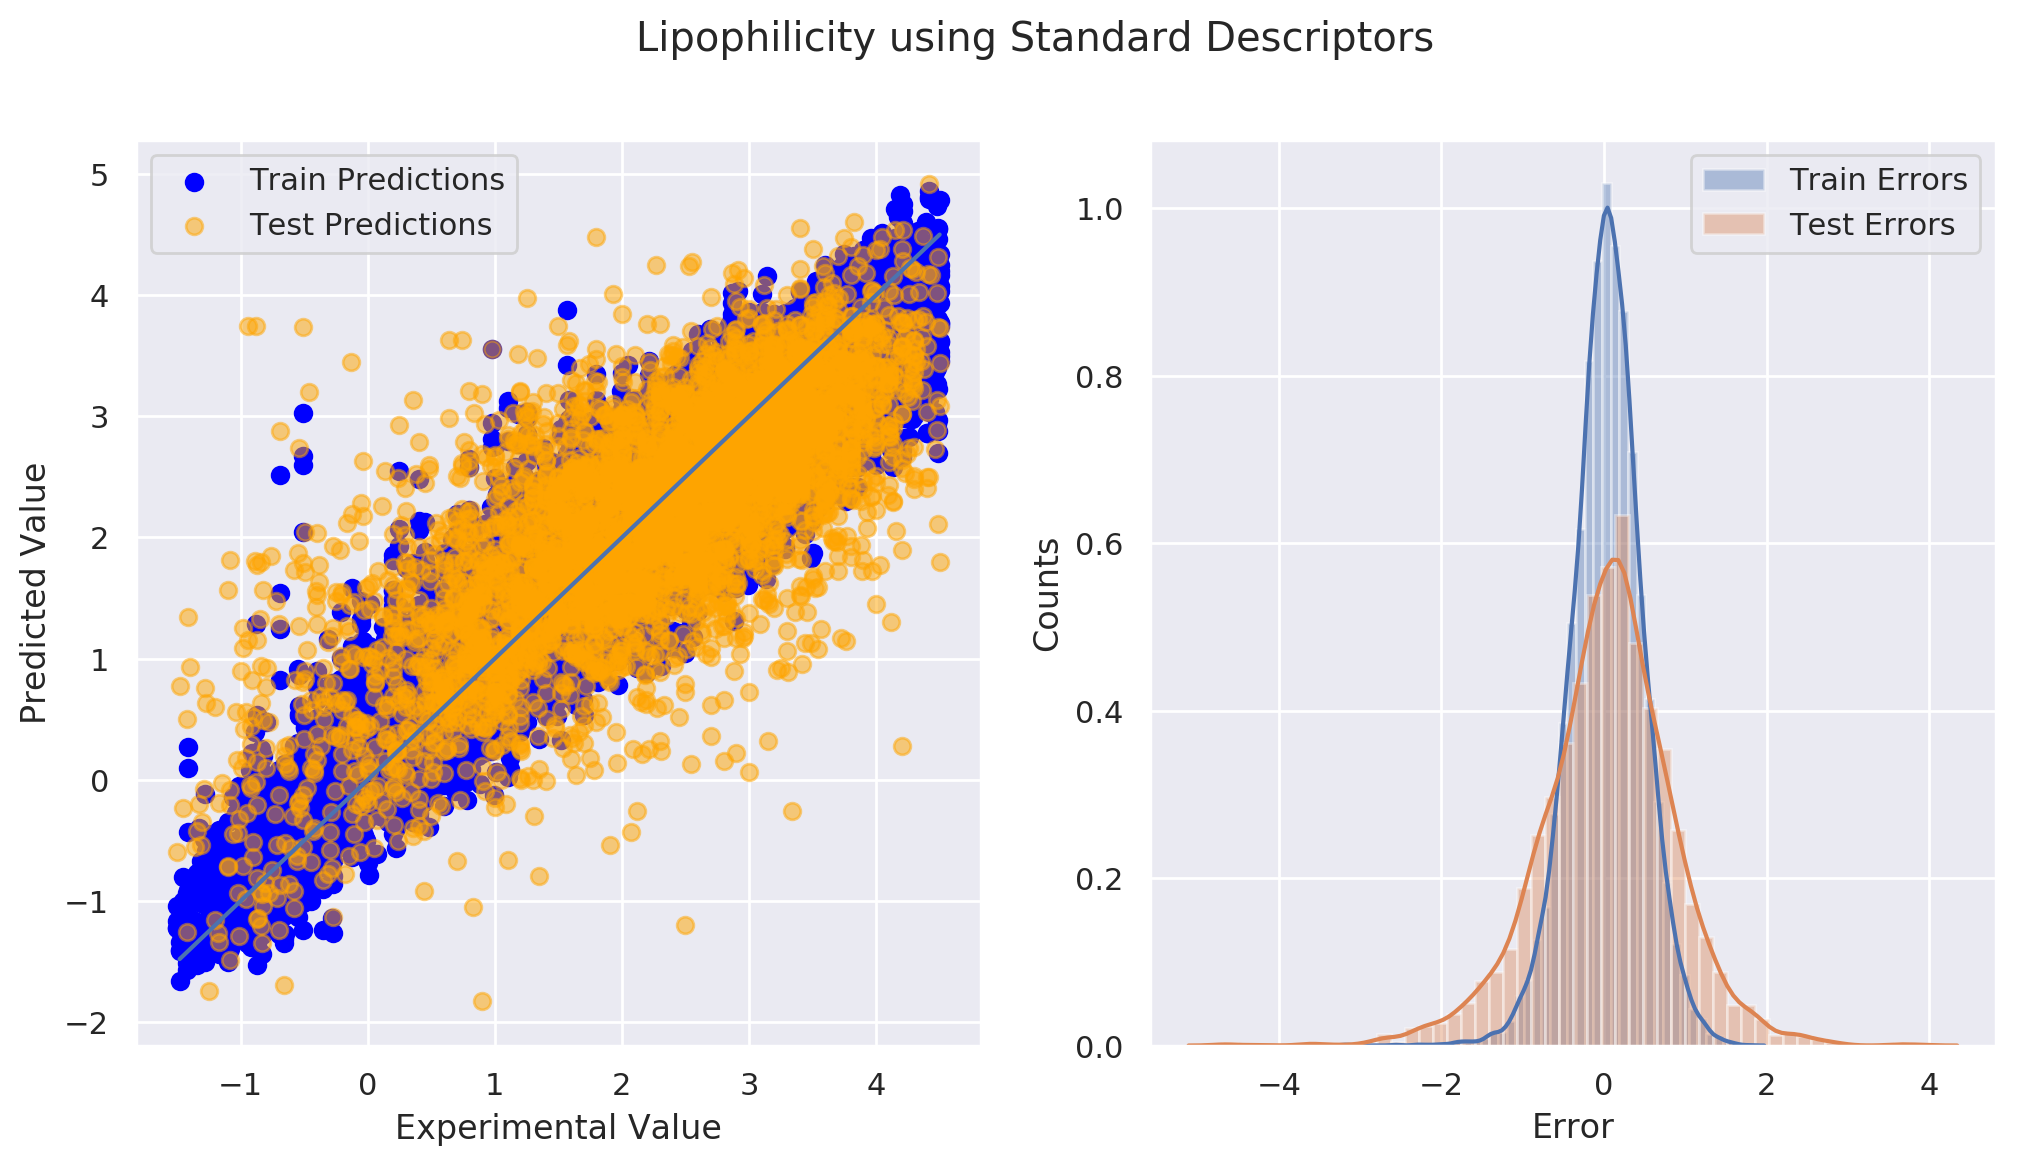

In [56]:
plot_results(predictions=lipo_sd_preds,fig_title='Lipophilicity using Standard Descriptors')

#### Amorphous 

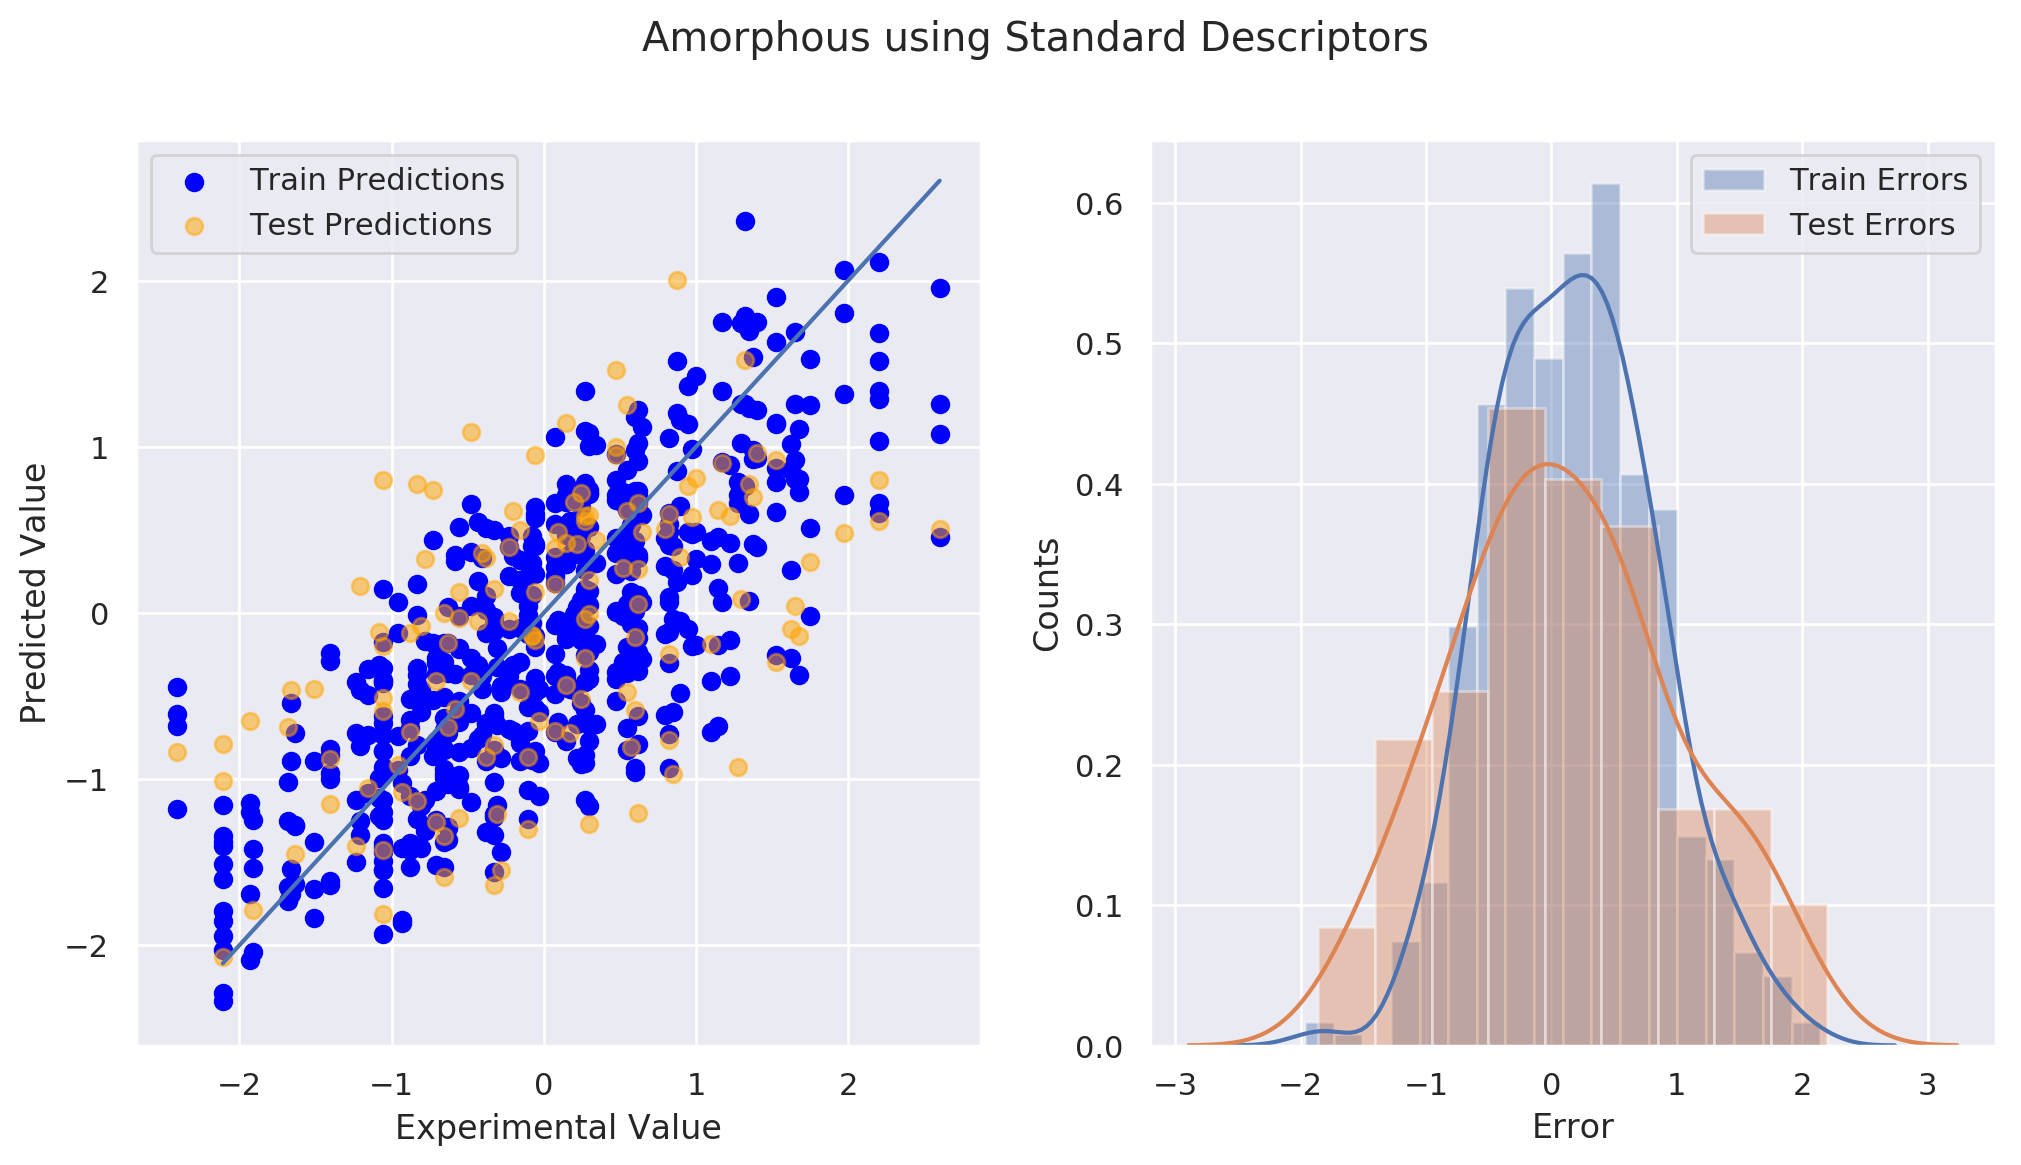

In [57]:
plot_results(predictions=amo_sd_preds,fig_title='Amorphous using Standard Descriptors')

### Cliques

#### Lipophilicity ALL

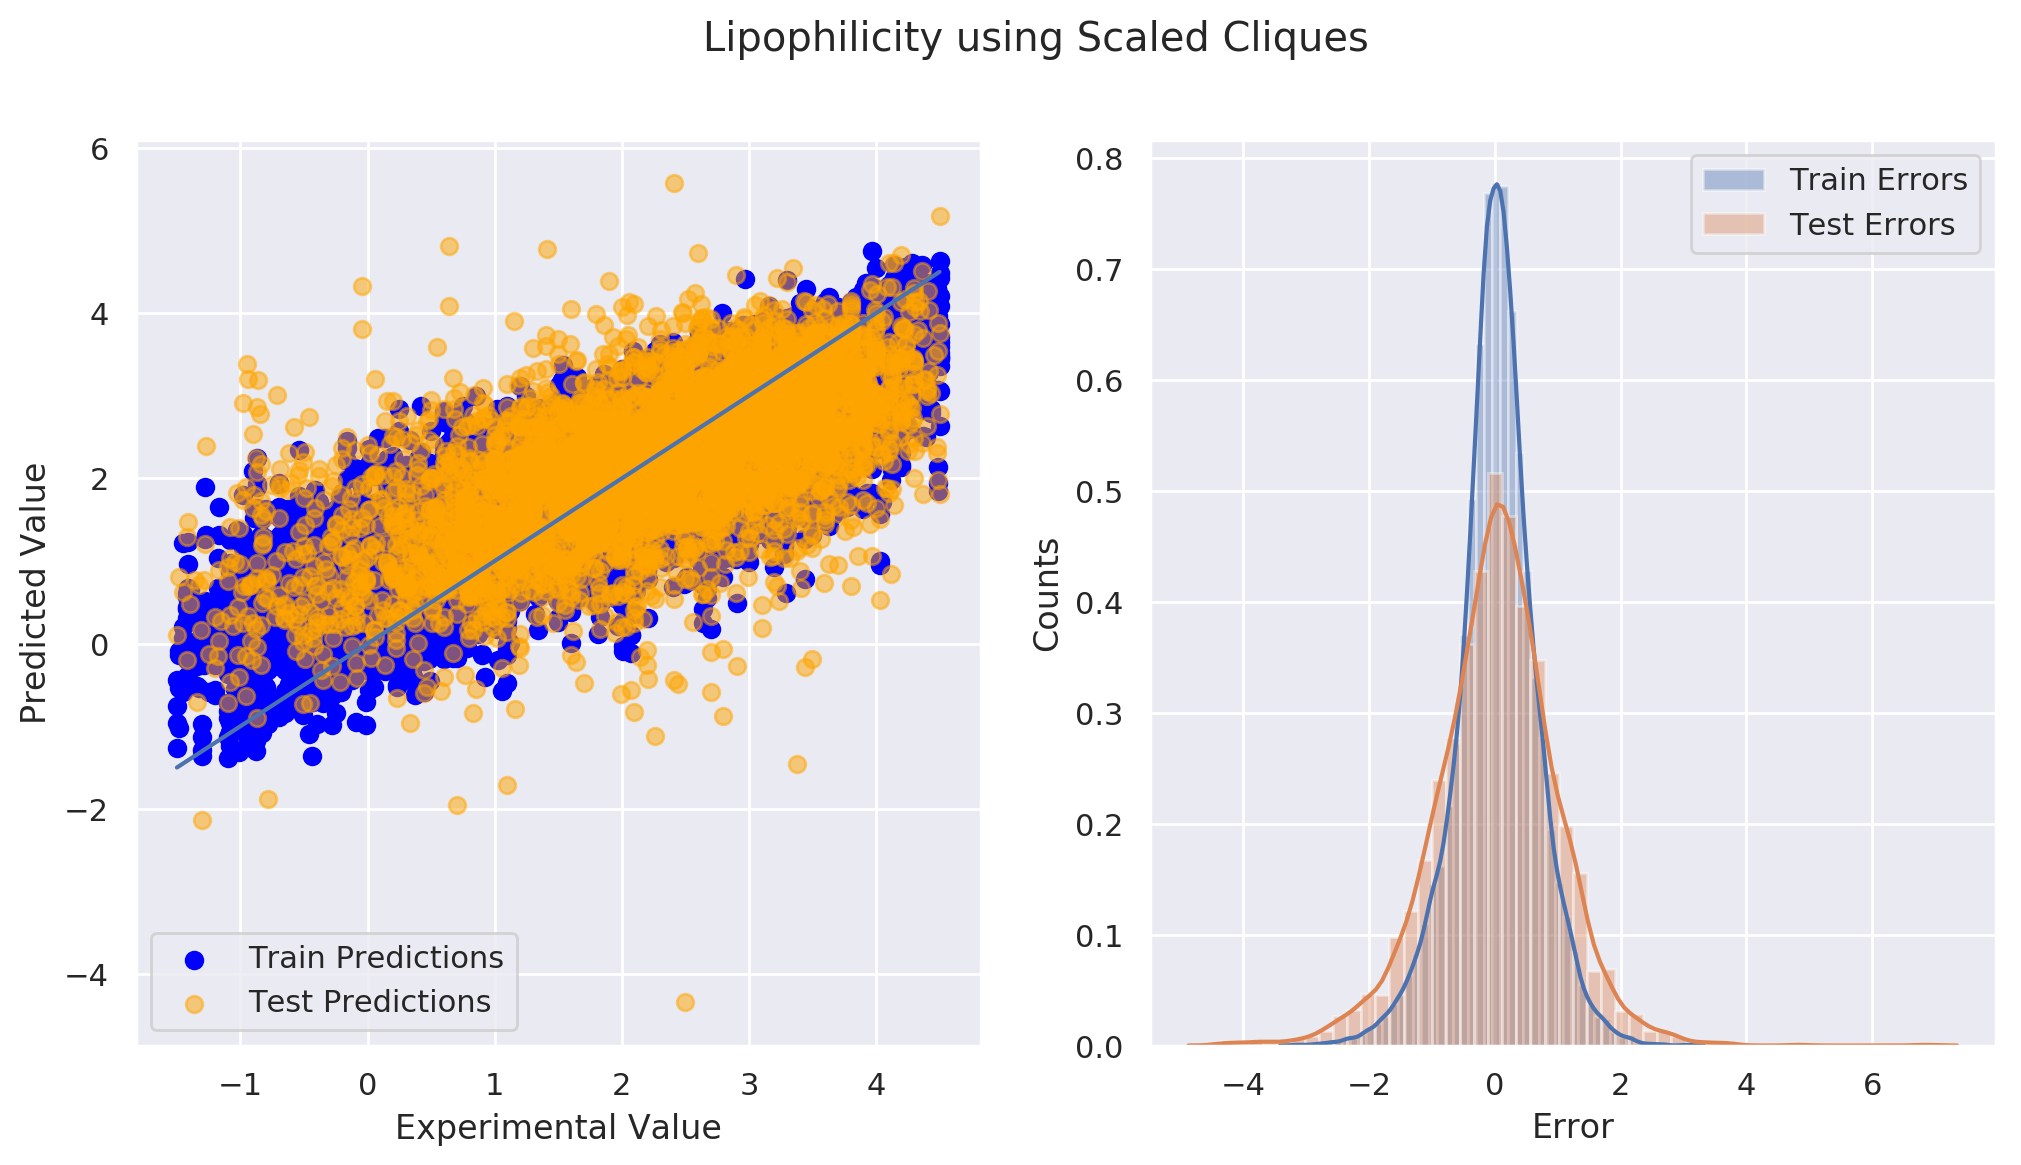

In [58]:
plot_results(predictions=lipo_cd_scaled_preds,fig_title='Lipophilicity using Scaled Cliques')

#### Lipophilicity 15

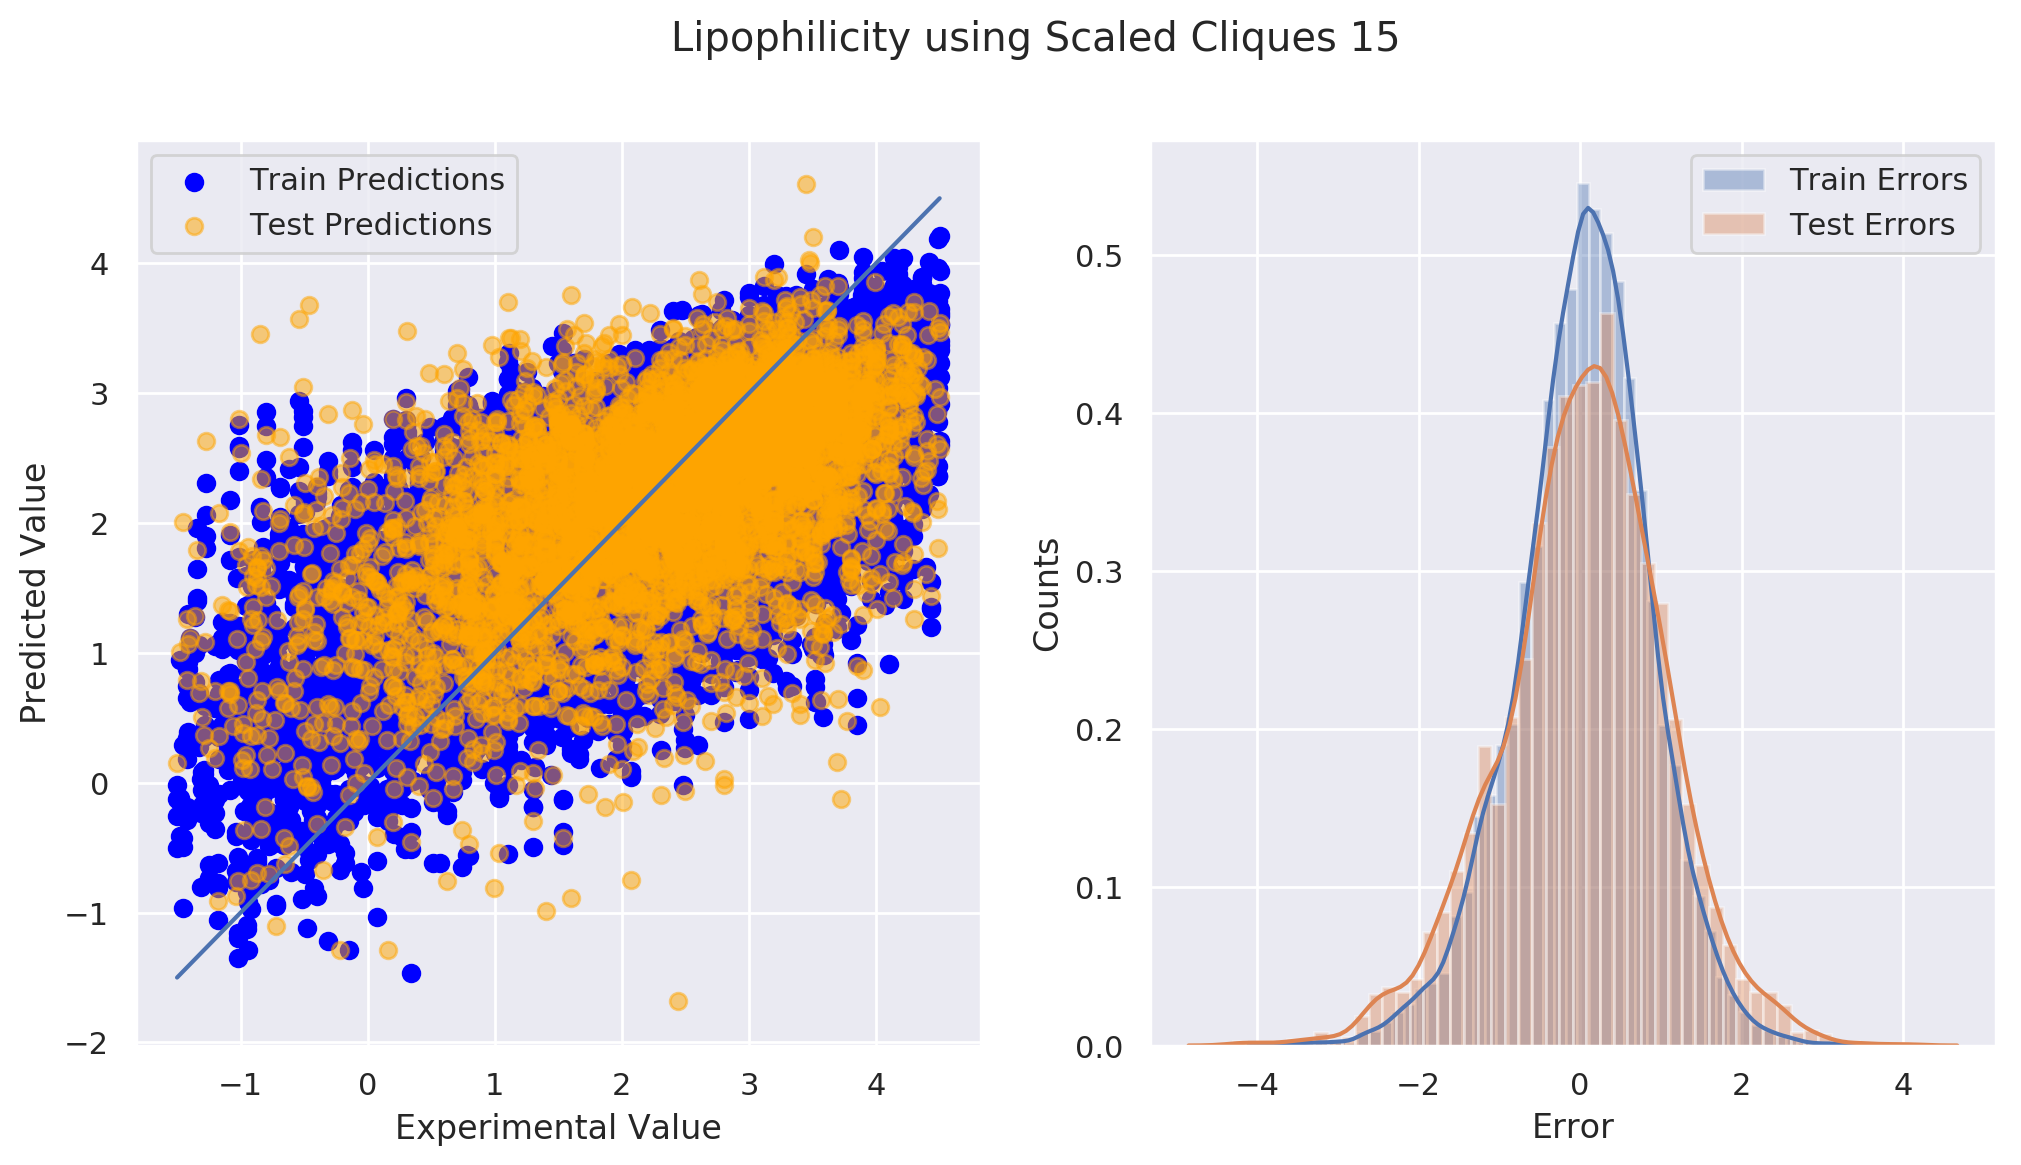

In [59]:
plot_results(predictions=lipo_cd_scaled_preds15,fig_title='Lipophilicity using Scaled Cliques 15')

#### Lipophilicity 40

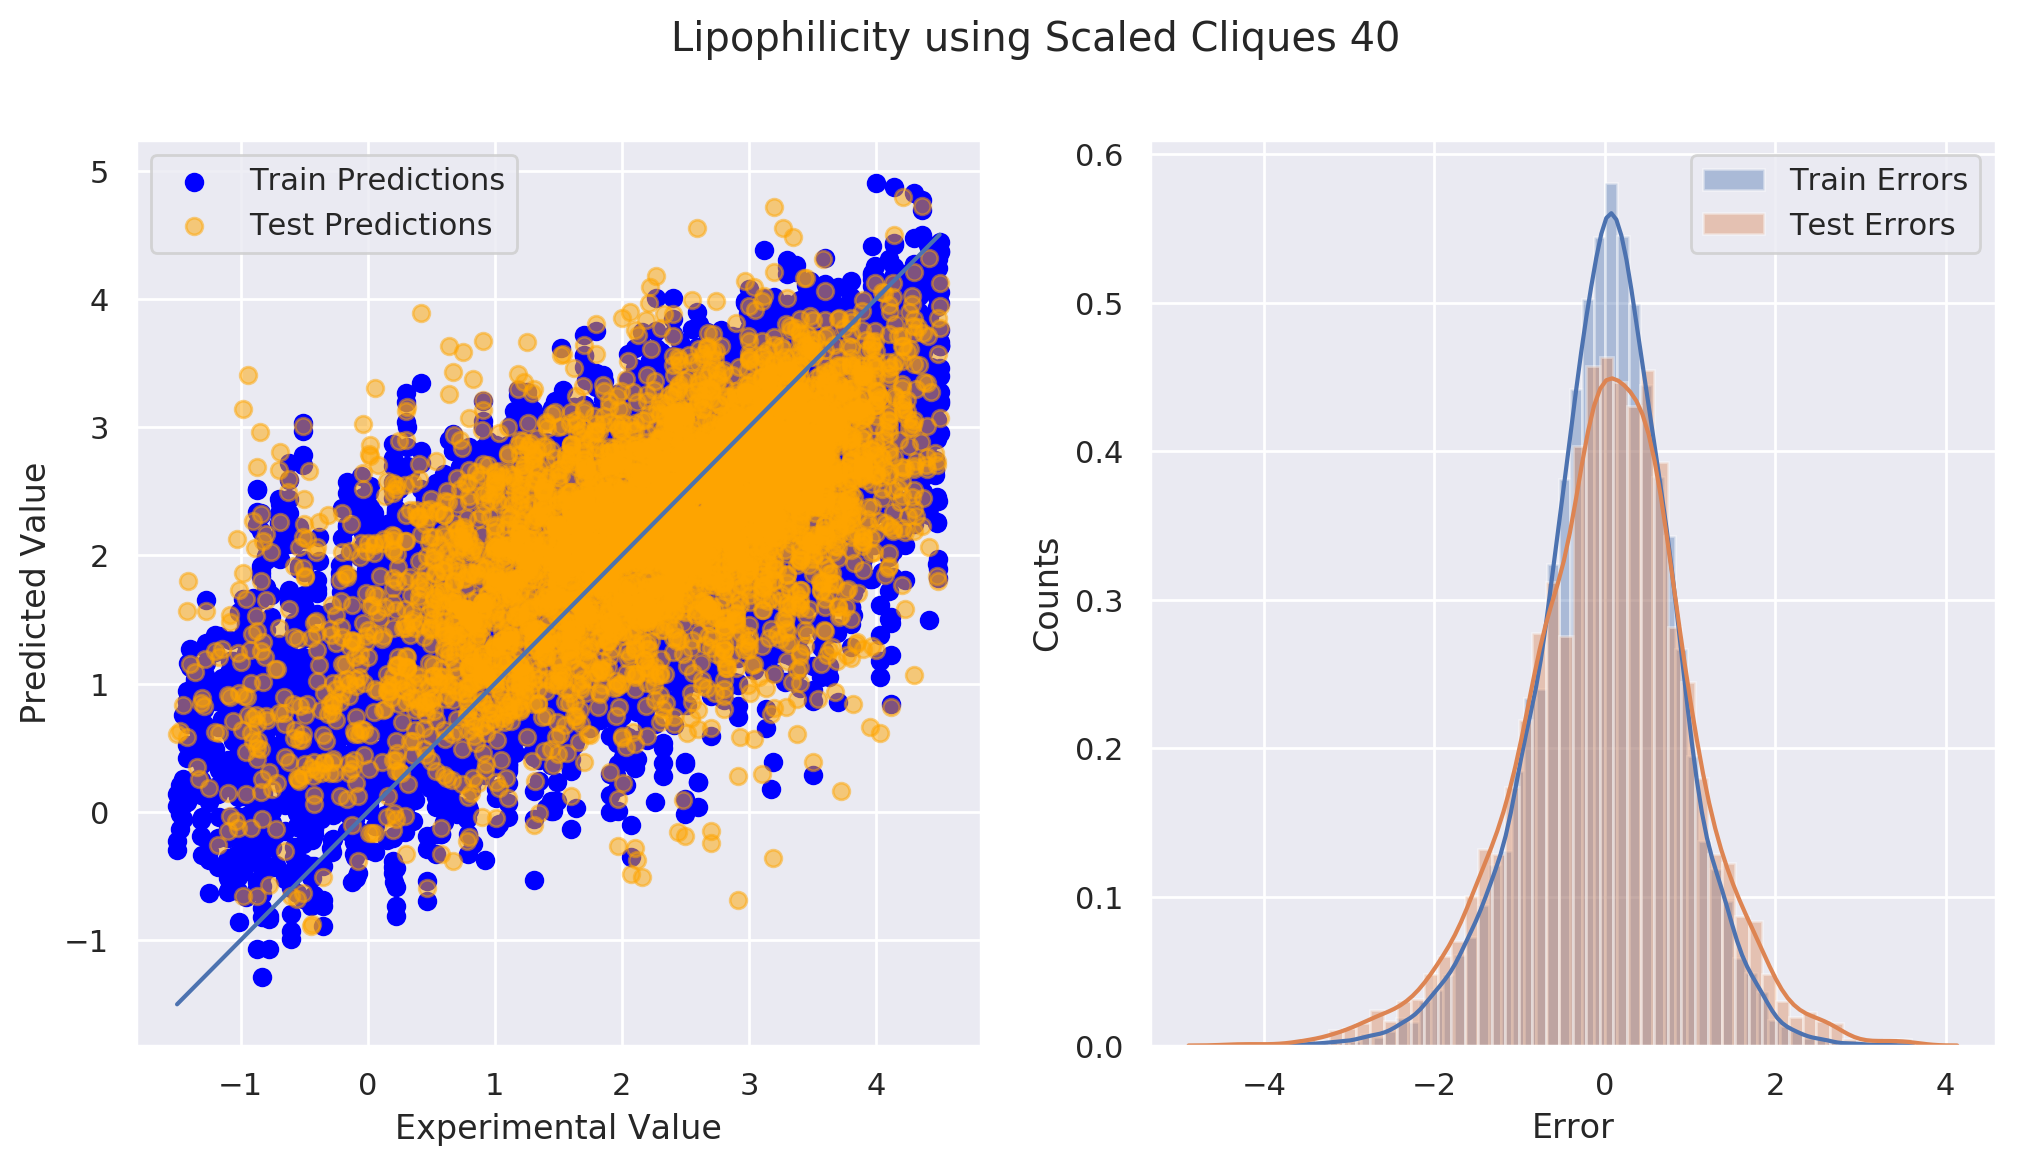

In [60]:
plot_results(predictions=lipo_cd_scaled_preds40,fig_title='Lipophilicity using Scaled Cliques 40')

#### Amorphous ALL

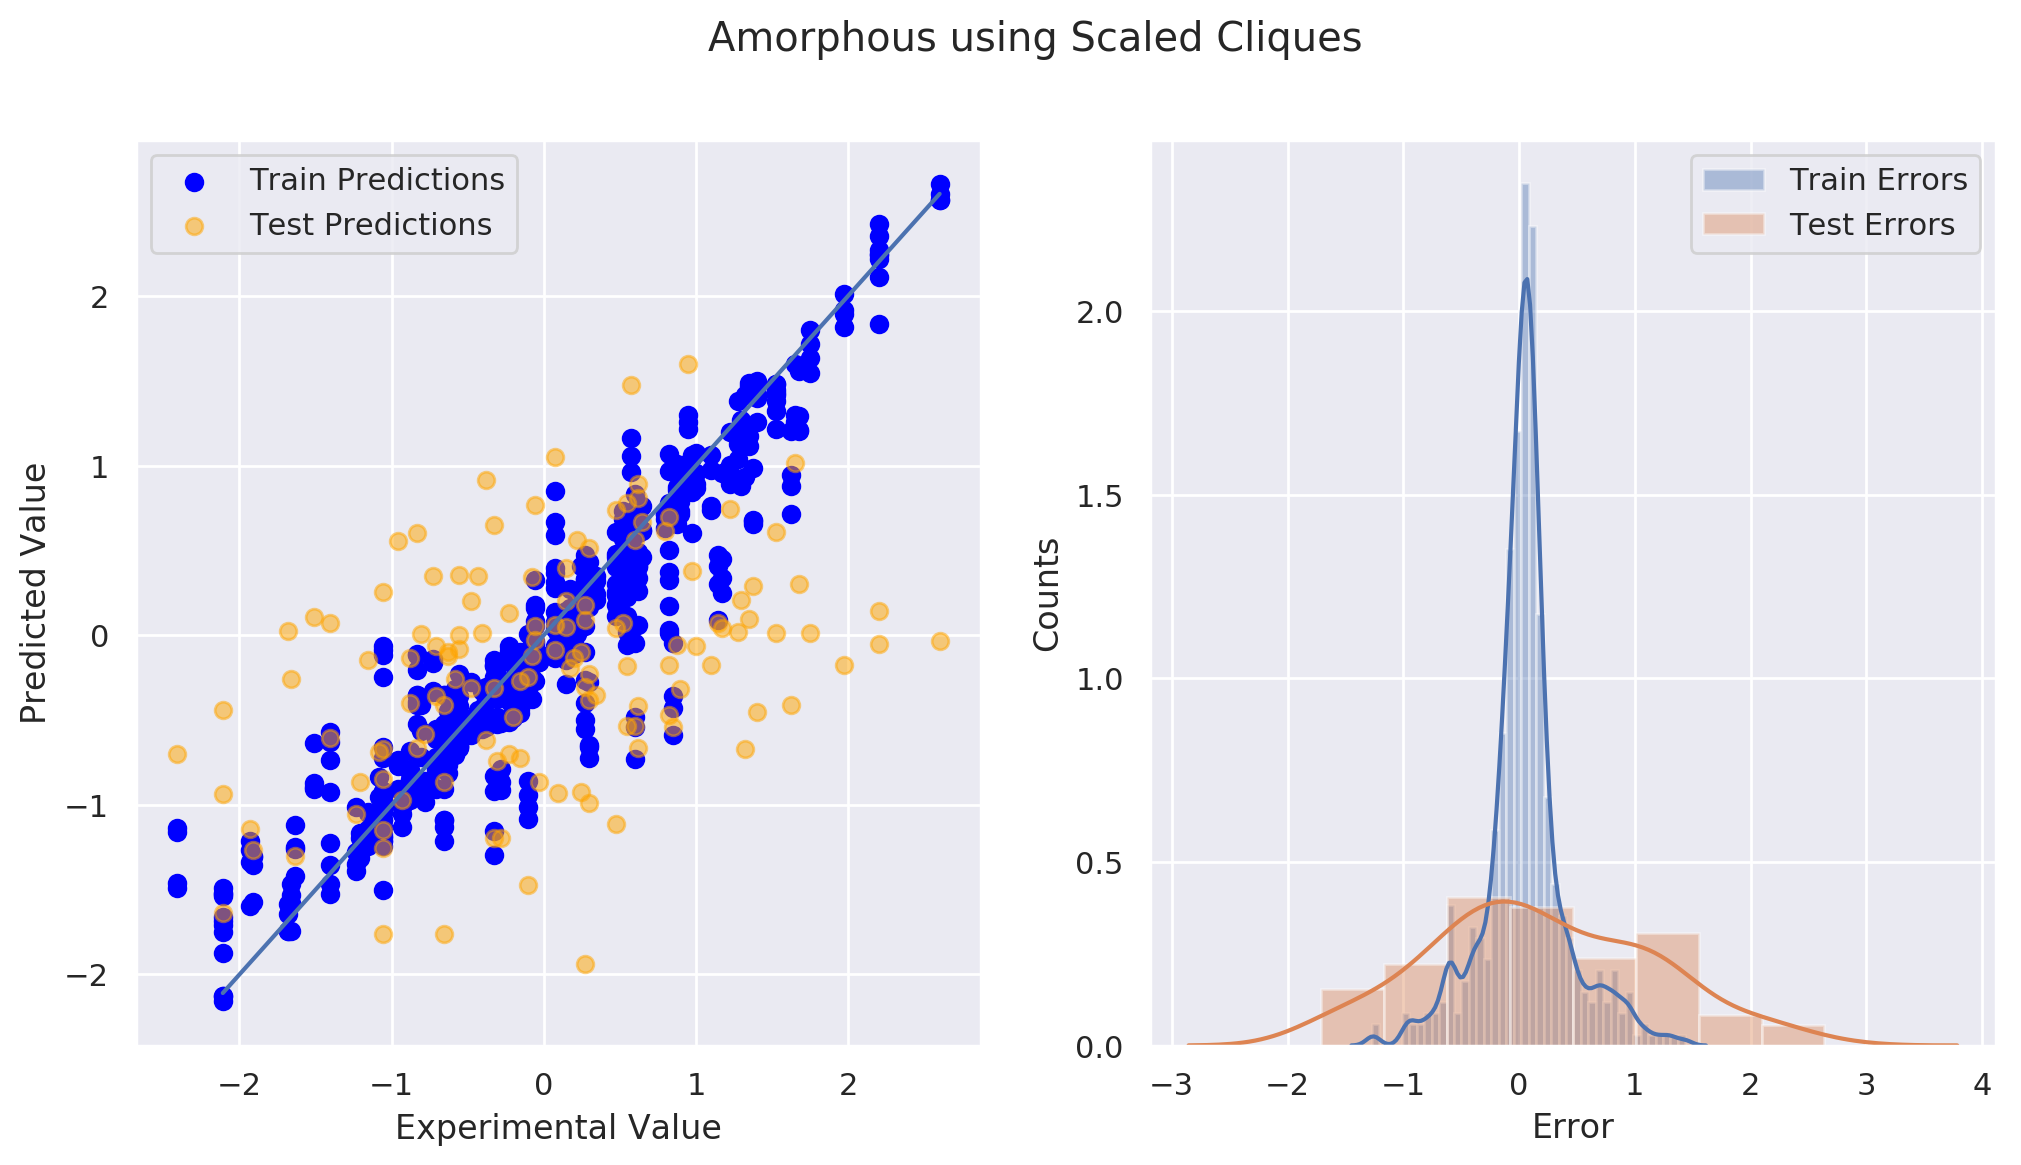

In [61]:
plot_results(predictions=amo_cd_scaled_preds,fig_title='Amorphous using Scaled Cliques')

#### Amorphous 6

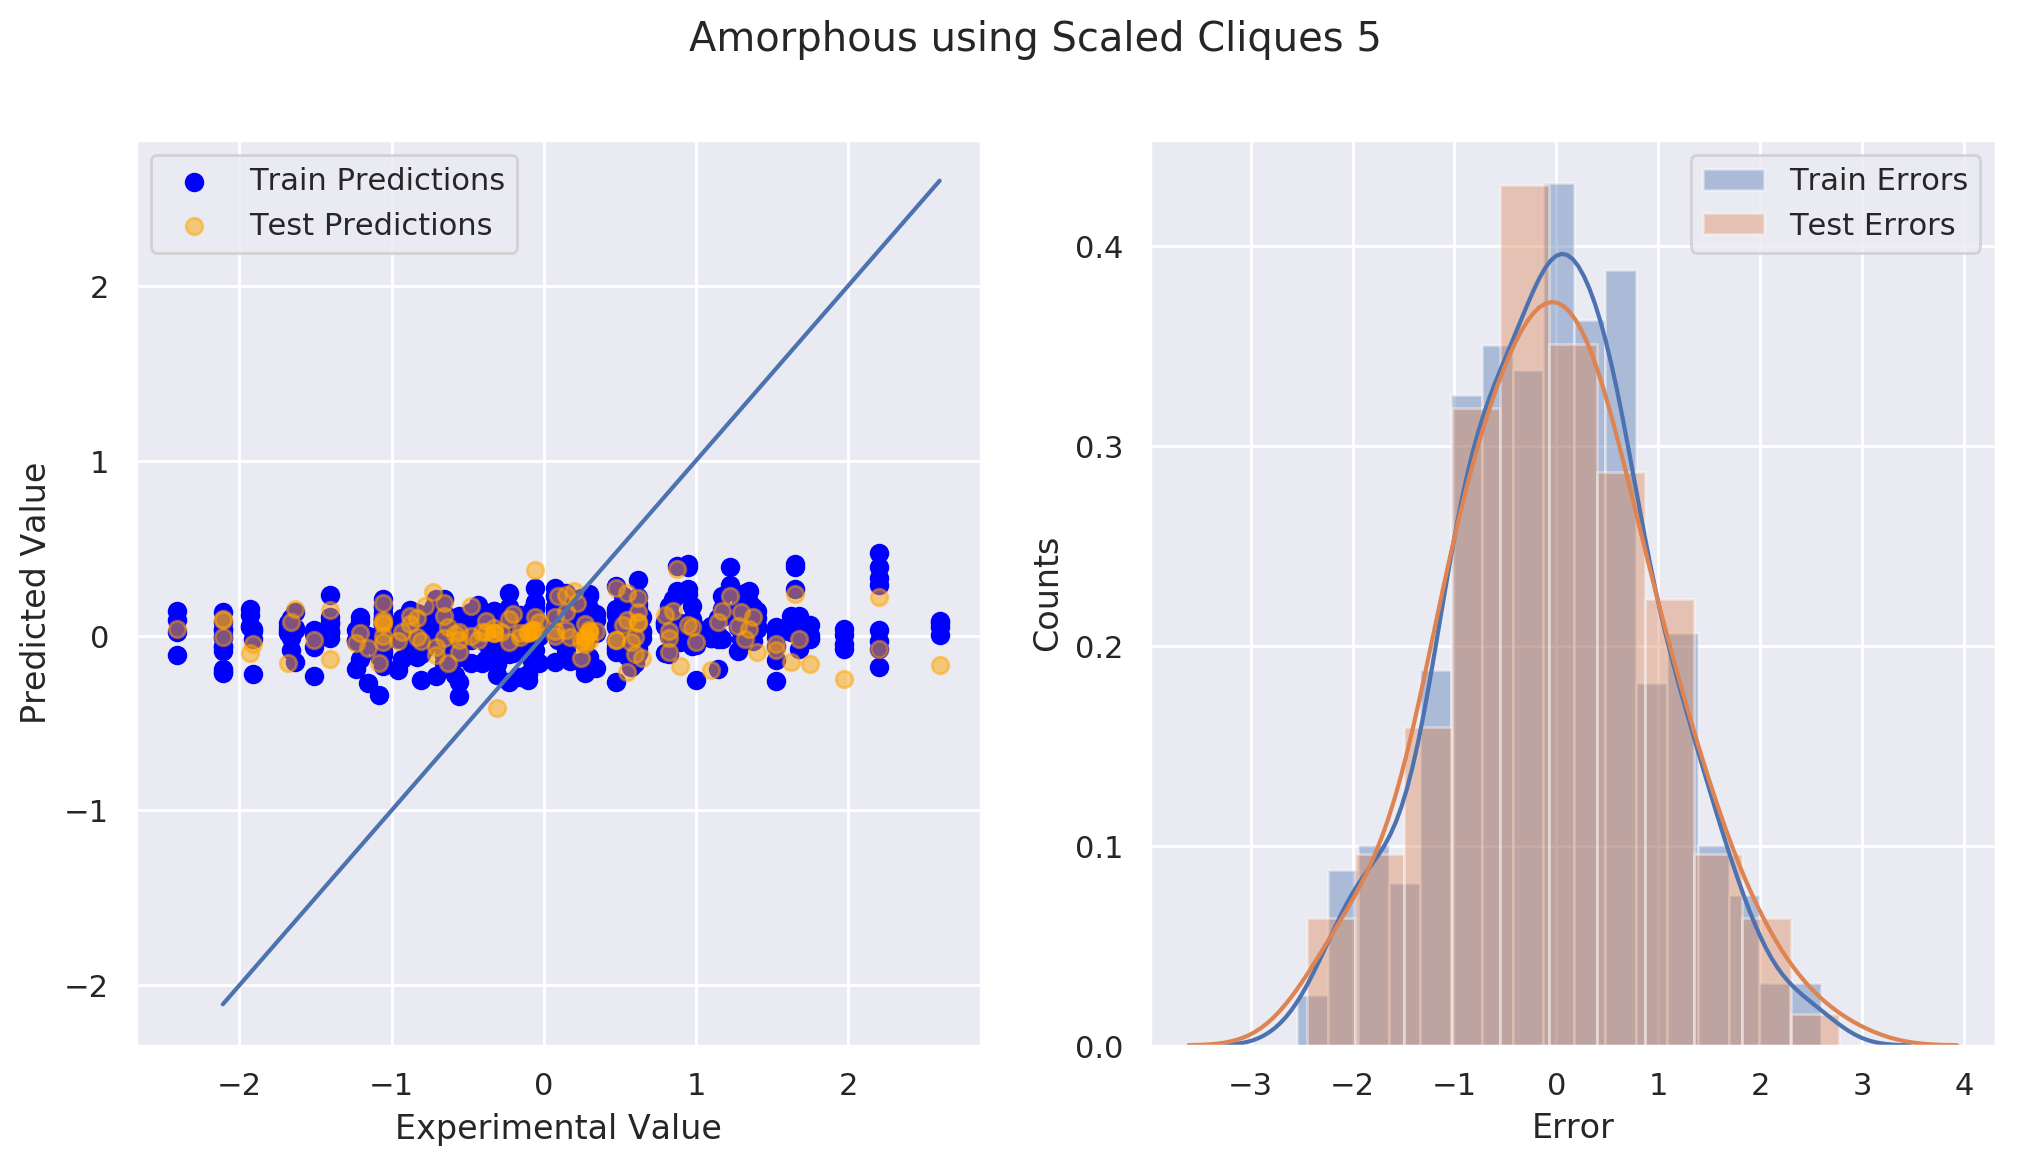

In [62]:
plot_results(predictions=amo_cd_scaled_preds6,fig_title='Amorphous using Scaled Cliques 5')

#### Amorphous 13

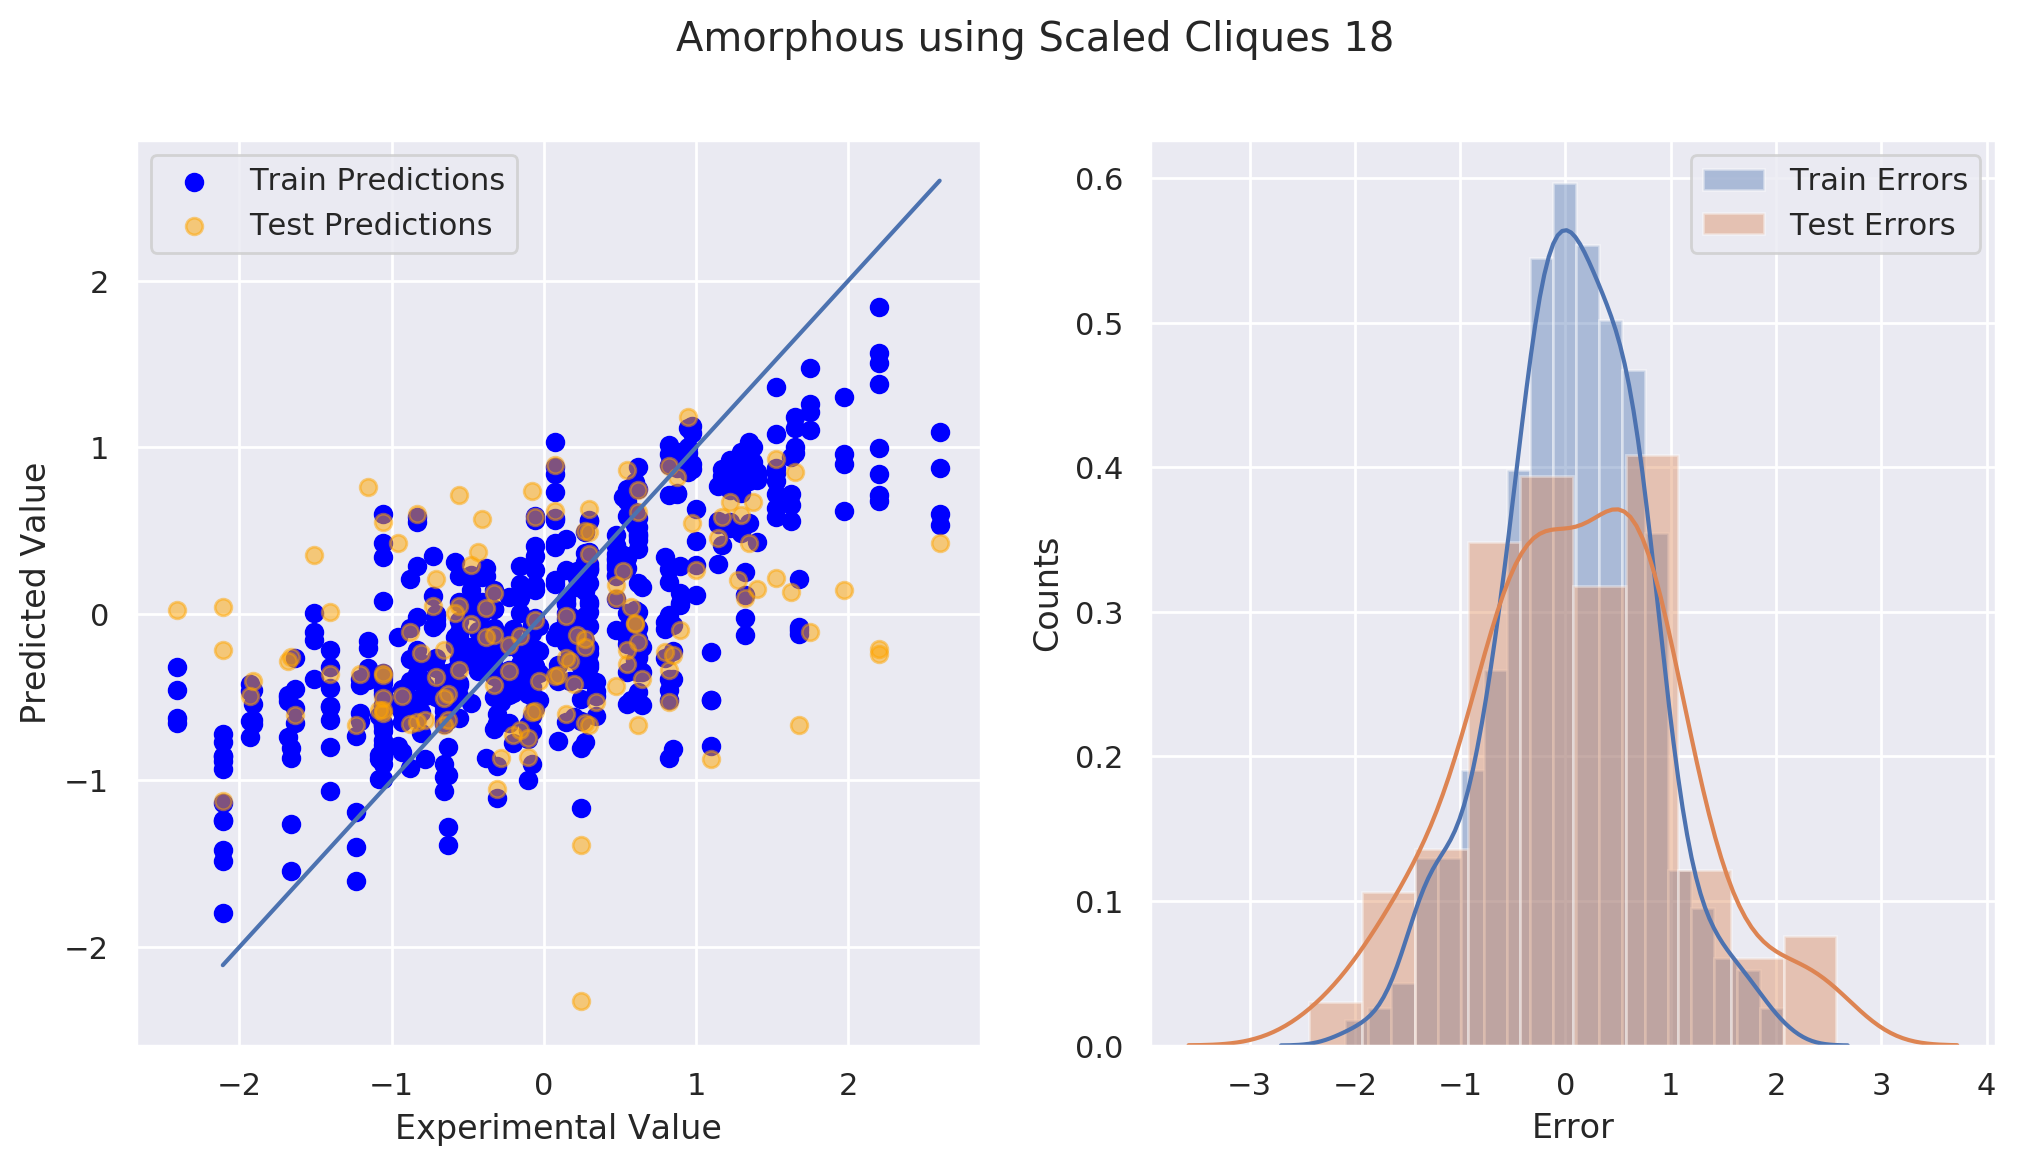

In [63]:
plot_results(predictions=amo_cd_scaled_preds13,fig_title='Amorphous using Scaled Cliques 18')

### wACSFs

#### Lipophilicity 

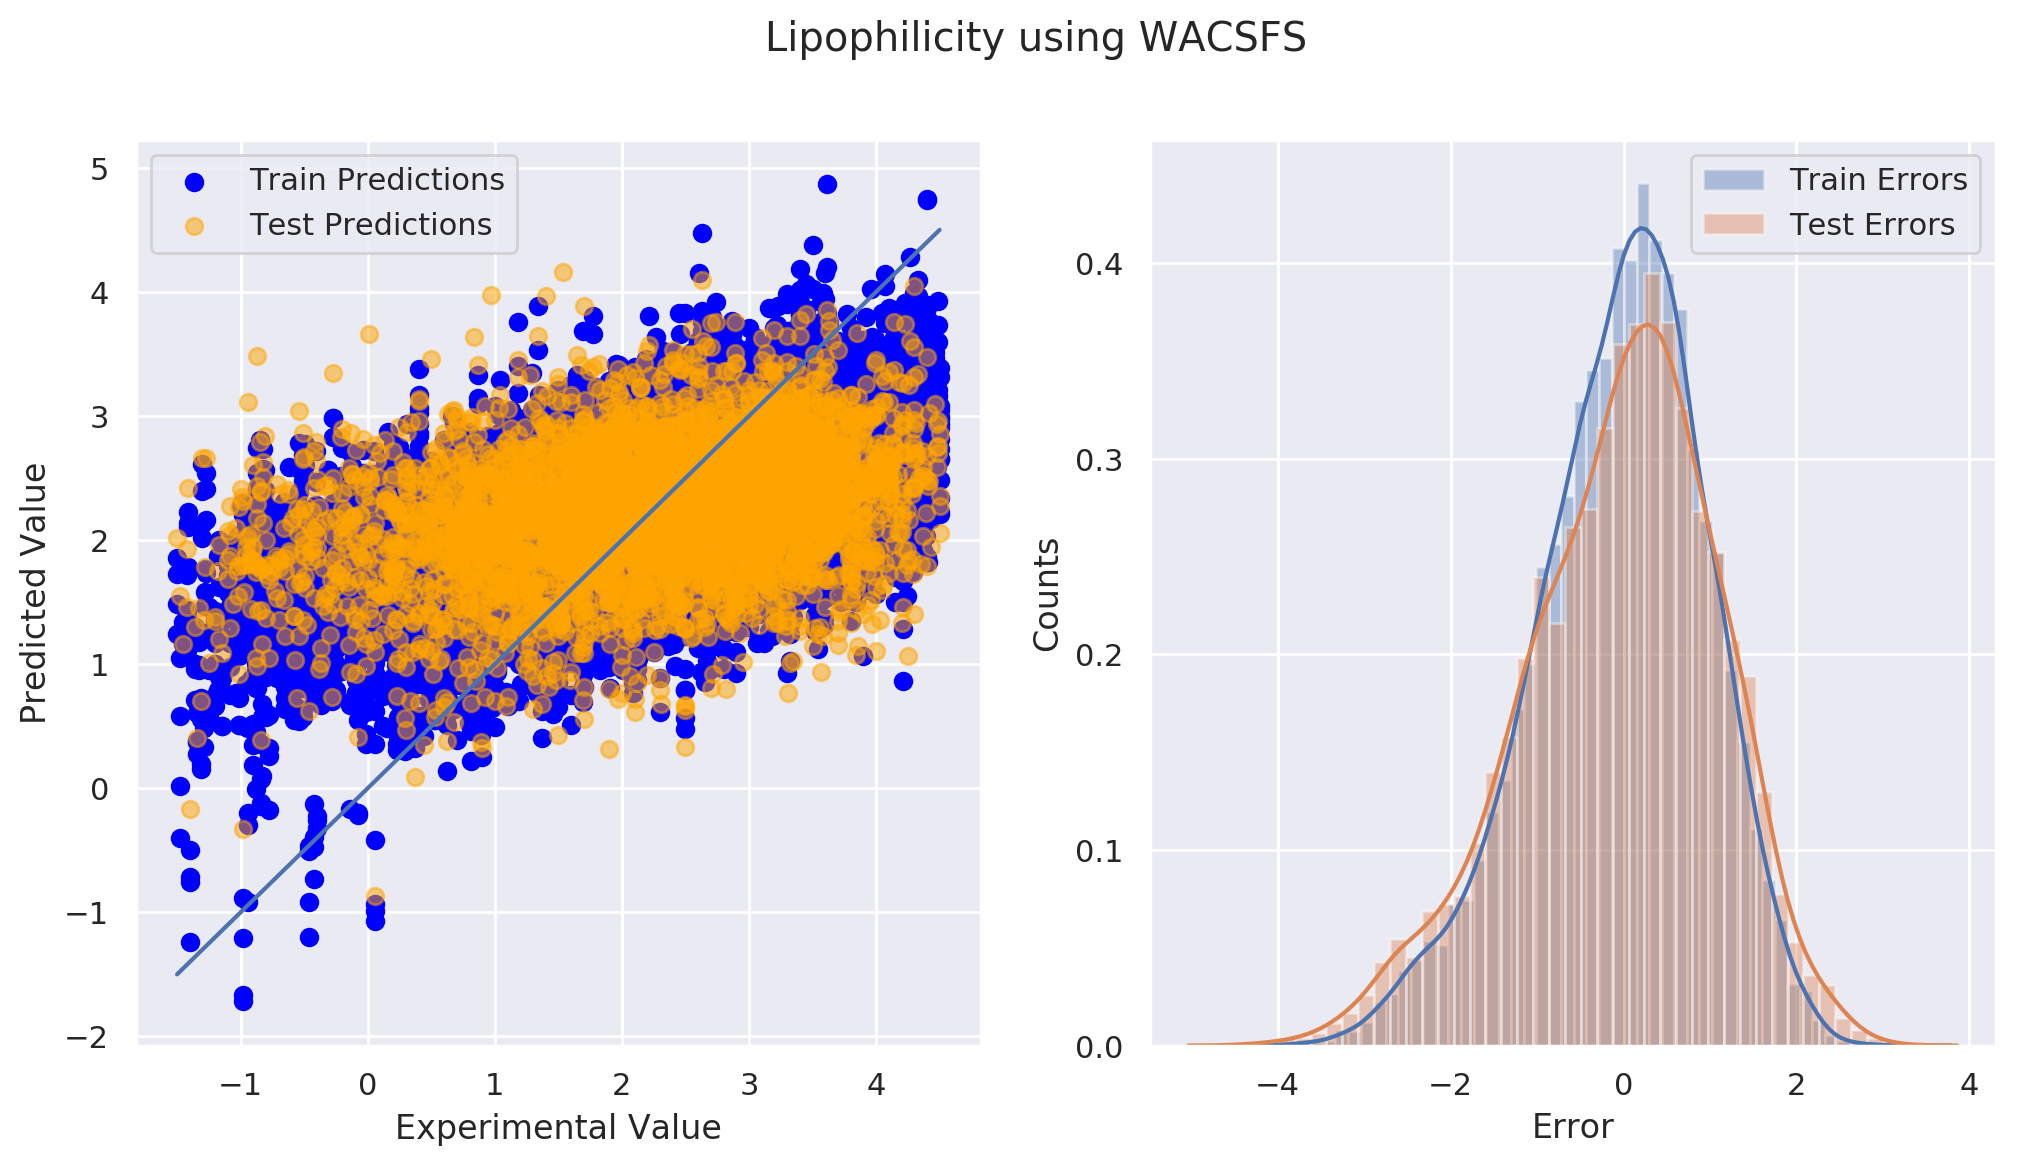

In [64]:
plot_results(predictions=lipo_wacsfs_preds,fig_title='Lipophilicity using WACSFS')

#### Amorphous 

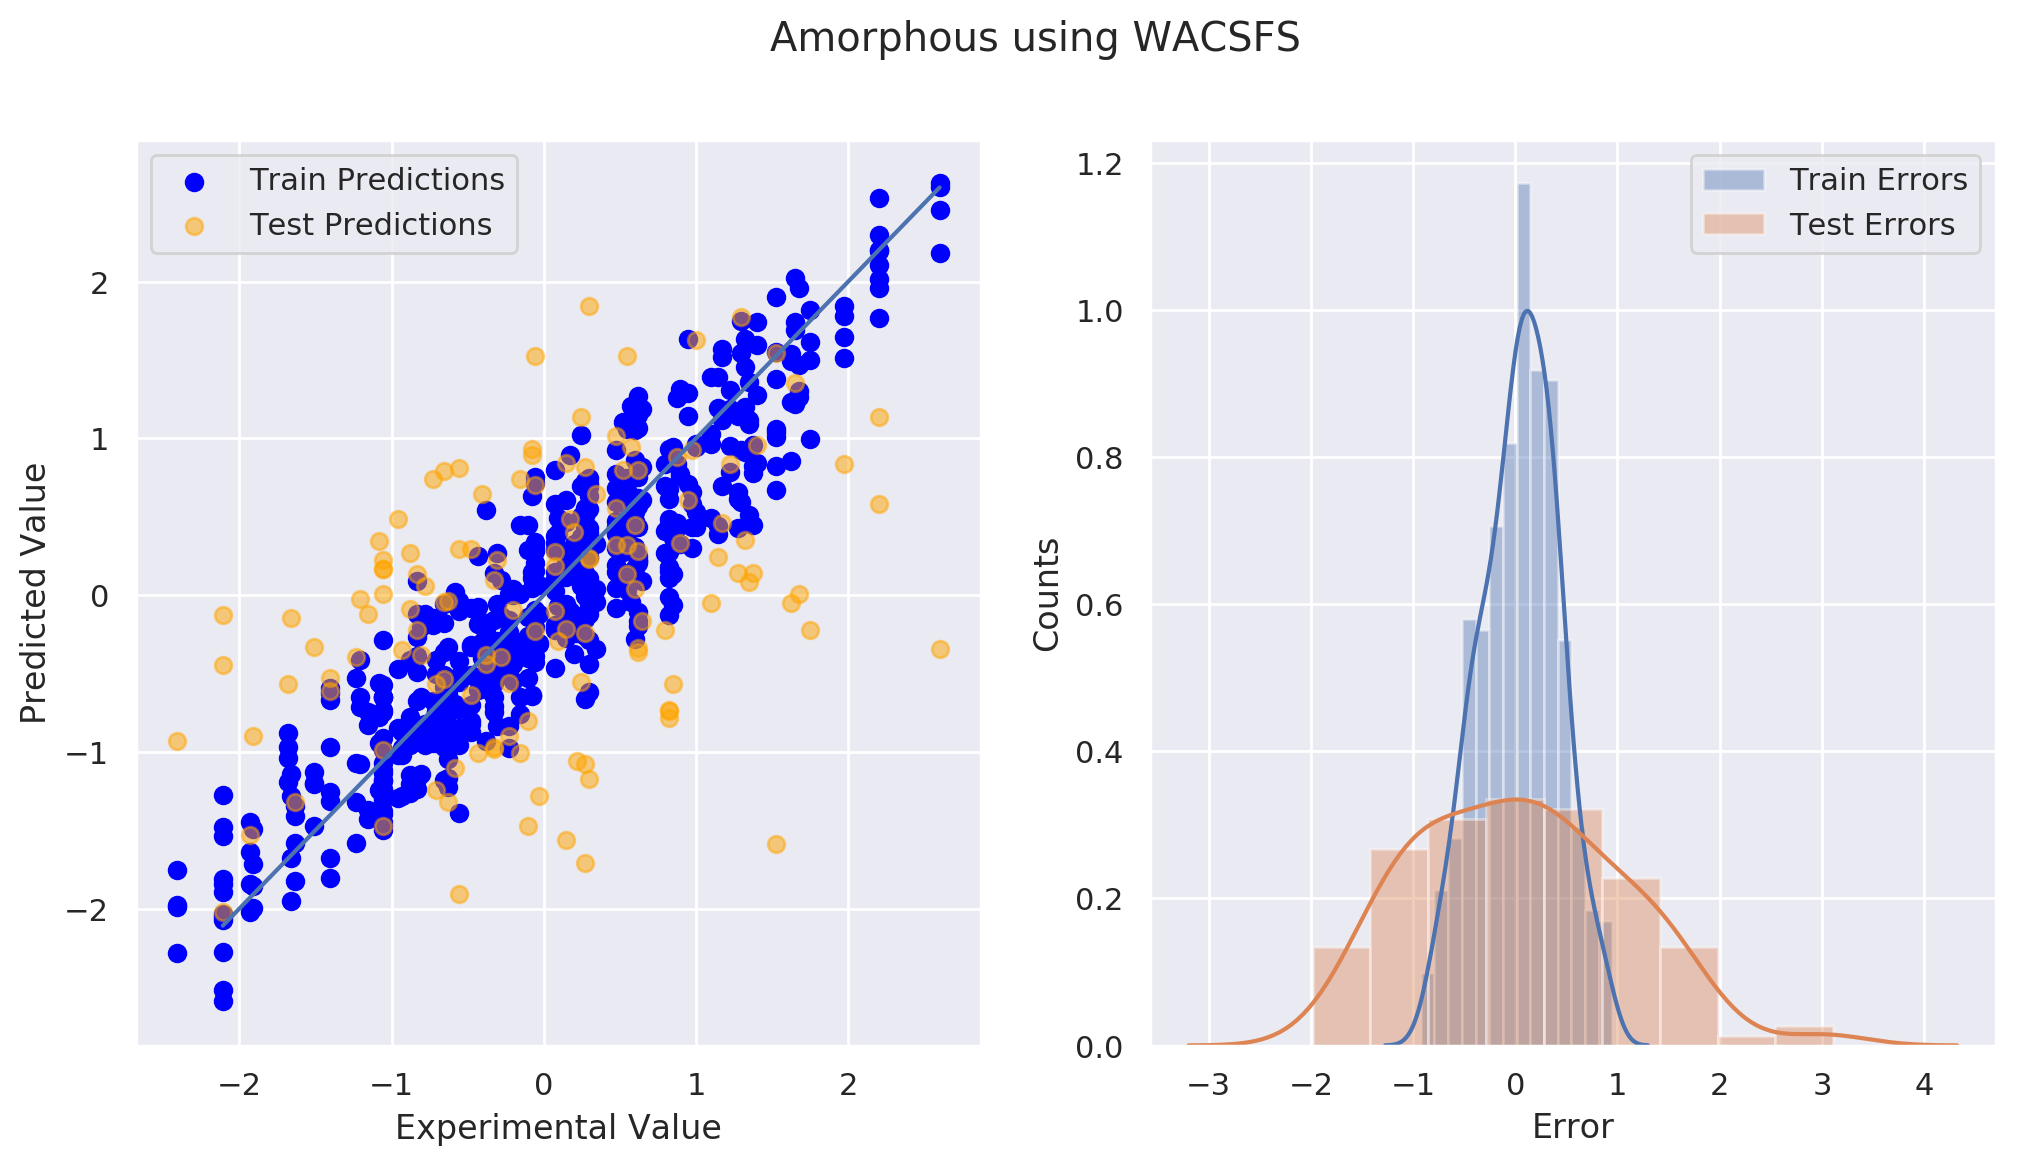

In [65]:
plot_results(predictions=amo_wacsfs_preds,fig_title='Amorphous using WACSFS')

## Feature selection: cliques

### Via Gaussian Process regression

The ARD kernel used has the variance and noise parameters fixed to 1.0 and 1e-5, respectively. Lengthscales are bounded to be between 1e-5 and 1e5. 

#### Lipophilicity

In [66]:
# This line is for lengthscale optimization
# lipo_predTR,lipo_predTE,lipo_LS=GPModel(lipo_cd_scaled_splits,np.ones([5,247]),1,'lbfgsb',2,[1e-5,1e5],1e-5)

# Saving optimized lengthscale, model predictions
# pickle.dump(lipo_LS,open('RESULTS/lipo_LS.pkl','wb'))
#pickle.dump(lipo_predTR,open('RESULTS/lipo_predTR.pkl','wb'))
#pickle.dump(lipo_predTE,open('RESULTS/lipo_predTE.pkl','wb'))

In [67]:
lipo_LS=pickle.load(open("RESULTS/lipo_LS.pkl","rb"))
lipo_predTR=pickle.load(open("RESULTS/lipo_predTR.pkl","rb"))
lipo_predTE=pickle.load(open("RESULTS/lipo_predTE.pkl","rb"))

# This is for training the model using the optimized lengthscales
#lipo_predTR,lipo_predTE,_=GPModel(lipo_cd_scaled_splits,ss,lipo_LS,0,'lbfgsb',1,[1e-5,1e5],1e-5)

In [68]:
GP_RFplot(lipo_cd_scaled_splits,lipo_predTR,lipo_predTE,lipo_ss,'Lipophilicity','GP',0.35)

NameError: name 'lipo_cd_scaled_splits' is not defined

In [ ]:
GP_MSE(lipo_cd_scaled_splits,lipo_predTR,lipo_predTE,lipo_ss)

In [ ]:
# Obtain sorted LS indices and mean LS value
lipo_sort_LS,lipo_meanrank_LS=sort_lengthscales(lipo_LS,5)
# Obtain mean lengthscale values
lipo_meanvalue_LS=mean_lengthscale(lipo_LS)

In [ ]:
lipo_minLS_df=get_LS_df(lipo_sort_LS[:20],vocabl_lipo,lipo_LS)

In [ ]:
lipo_maxLS_df=get_LS_df(lipo_sort_LS[-20:],vocabl_lipo,lipo_LS)

## Via Random Forests

#### Lipophilicity

In [ ]:
#lipo_RFpredTR,lipo_RFpredTE,lipo_gini=get_RFmodel(lipo_cd_scaled_splits,lipo_ss)

# Saving optimized gini, model predictions
# pickle.dump(lipo_gini,open('./RESULTS/lipo_gini.pkl','wb')) # CHANGED
# pickle.dump(lipo_RFpredTR,open('./RESULTS/lipo_RFpredTR.pkl','wb'))
# pickle.dump(lipo_RFpredTE,open('./RESULTS/lipo_RFpredTE.pkl','wb'))

In [ ]:
# Loading the optimised gini
lipo_gini = pickle.load(open('./RESULTS/lipo_gini.pkl','rb'))
lipo_RFpredTR = pickle.load(open('./RESULTS/lipo_RFpredTR.pkl','rb'))
lipo_RFpredTE = pickle.load(open('./RESULTS/lipo_RFpredTE.pkl','rb'))

In [ ]:
GP_RFplot(lipo_cd_scaled_splits,lipo_RFpredTR,lipo_RFpredTE,lipo_ss,data_name='Lipo',model='RF',alpha=0.35)

In [ ]:
RF_MSE(lipo_cd_scaled_splits,lipo_RFpredTR,lipo_RFpredTE,lipo_ss)

In [ ]:
lipo_sorted_gini,lipo_rank_gini=sort_gini(lipo_gini,5)

In [ ]:
lipo_max20_gini_df=get_gini_df(lipo_rank_gini[:20],vocabl_lipo,lipo_gini)

In [ ]:
lipo_min20_gini_df=get_gini_df(lipo_rank_gini[-20:],vocabl_lipo,lipo_gini)

#### Amorphous

In [ ]:
# amo_RFpredTR,amo_RFpredTE,amo_gini=get_RFmodel(amo_cd_scaled_splits,amo_ss)

# # # Saving optimized gini, model predictions
# pickle.dump(amo_gini,open('./RESULTS/amo_gini.pkl','wb'))
# pickle.dump(amo_RFpredTR,open('./RESULTS/amo_RFpredTR.pkl','wb'))
# pickle.dump(amo_RFpredTE,open('./RESULTS/amo_RFpredTE.pkl','wb'))

In [ ]:
# Loading the optimised gini
amo_gini = pickle.load(open('./RESULTS/amo_gini.pkl','rb'))
amo_RFpredTR = pickle.load(open('./RESULTS/amo_RFpredTR.pkl','rb'))
amo_RFpredTE = pickle.load(open('./RESULTS/amo_RFpredTE.pkl','rb'))

In [ ]:
GP_RFplot(amo_cd_scaled_splits,amo_RFpredTR,amo_RFpredTE,amo_ss,'Amorphous','RF',0.5)

In [ ]:
RF_MSE(amo_cd_scaled_splits,amo_RFpredTR,amo_RFpredTE,amo_ss)

In [ ]:
amo_sorted_gini,amo_rank_gini=sort_gini(amo_gini,5)
amo_gini_df=get_gini_df(amo_rank_gini,vocabl_amo,amo_gini)

### Random forests on different splits

#### 1. Lipophilicty 

In [ ]:
# Defining the KFold
kf20=RepeatedKFold(n_splits=20,n_repeats=1,random_state=20)

In [ ]:
lipo_cd_scaled_splits20=get_train_test_splits(clique_decomposition_lipo_scaled,df_lipo['Lipophilicity_scaled'],kf20)

In [ ]:
# lipo_RFpredTR20,lipo_RFpredTE20,lipo_gini20=get_RFmodel(lipo_cd_scaled_splits20,lipo_ss)

# # Saving optimized gini, model predictions
# pickle.dump(lipo_gini20,open('./RESULTS/lipo_gini20.pkl','wb')) # CHANGED
# pickle.dump(lipo_RFpredTR20,open('./RESULTS/lipo_RFpredTR20.pkl','wb'))
# pickle.dump(lipo_RFpredTE20,open('./RESULTS/lipo_RFpredTE20.pkl','wb'))

In [ ]:
# Loading the optimised gini
lipo_gini20 = pickle.load(open('./RESULTS/lipo_gini20.pkl','rb'))
lipo_RFpredTR20 = pickle.load(open('./RESULTS/lipo_RFpredTR20.pkl','rb'))
lipo_RFpredTE20 = pickle.load(open('./RESULTS/lipo_RFpredTE20.pkl','rb'))

In [ ]:
GP_RFplot(lipo_cd_scaled_splits20,lipo_RFpredTR20,lipo_RFpredTE20,lipo_ss,data_name='Lipo',model='RF',alpha=0.35)

In [ ]:
RF_MSE(lipo_cd_scaled_splits20,lipo_RFpredTR20,lipo_RFpredTE20,lipo_ss);

In [ ]:
lipo_sorted_gini20,lipo_rank_gini20=sort_gini(lipo_gini20,20)
lipo_max20_gini_df20=get_gini_df(lipo_rank_gini20[:20],vocabl_lipo,lipo_gini20)
lipo_min20_gini_df20=get_gini_df(lipo_rank_gini20[-20:],vocabl_lipo,lipo_gini20)

In [ ]:
# Loading the optimised gini
amo_gini20 = pickle.load(open('./RESULTS/amo_gini20.pkl','rb'))
amo_RFpredTR20 = pickle.load(open('./RESULTS/amo_RFpredTR20.pkl','rb'))
amo_RFpredTE20 = pickle.load(open('./RESULTS/amo_RFpredTE20.pkl','rb'))# lipo_min20_gini_df20

In [69]:
lipo_all_sorted = get_gini_df(lipo_rank_gini20[:50],vocabl_lipo,lipo_gini20)

NameError: name 'lipo_rank_gini20' is not defined

In [70]:
plot_gini(lipo_all_sorted,'Lipo all')

NameError: name 'lipo_all_sorted' is not defined

Natural thresholds for the lipo dataset would be: (1.) the largest 15 cliques (2.) the largest 40 cliques

#### 3. Amorphous 20 Splits

In [71]:
amo_cd_scaled_splits20=get_train_test_splits(clique_decomposition_amo_scaled,df_amo['tg_scaled'],kf20)

NameError: name 'kf20' is not defined

In [72]:
# amo_RFpredTR20,amo_RFpredTE20,amo_gini20=get_RFmodel(amo_cd_scaled_splits20,amo_ss)

# # Saving gini, model predictions
# pickle.dump(amo_gini20,open('./RESULTS/amo_gini20.pkl','wb'))
# pickle.dump(amo_RFpredTR20,open('./RESULTS/amo_RFpredTR20.pkl','wb'))
# pickle.dump(amo_RFpredTE20,open('./RESULTS/amo_RFpredTE20.pkl','wb'))

In [73]:
# Loading the optimised gini
amo_gini20 = pickle.load(open('./RESULTS/amo_gini20.pkl','rb'))
amo_RFpredTR20 = pickle.load(open('./RESULTS/amo_RFpredTR20.pkl','rb'))
amo_RFpredTE20 = pickle.load(open('./RESULTS/amo_RFpredTE20.pkl','rb'))

In [74]:
GP_RFplot(amo_cd_scaled_splits20,amo_RFpredTR20,amo_RFpredTE20,amo_ss,'Amorphous','RF',0.50)

NameError: name 'amo_cd_scaled_splits20' is not defined

In [75]:
RF_MSE(amo_cd_scaled_splits20,amo_RFpredTR20,amo_RFpredTE20,amo_ss)

NameError: name 'amo_cd_scaled_splits20' is not defined

In [76]:
amo_sorted_gini20,amo_rank_gini20=sort_gini(amo_gini20,20)
amo_max_gini_df20=get_gini_df(amo_rank_gini20[:50],vocabl_amo,amo_gini20)

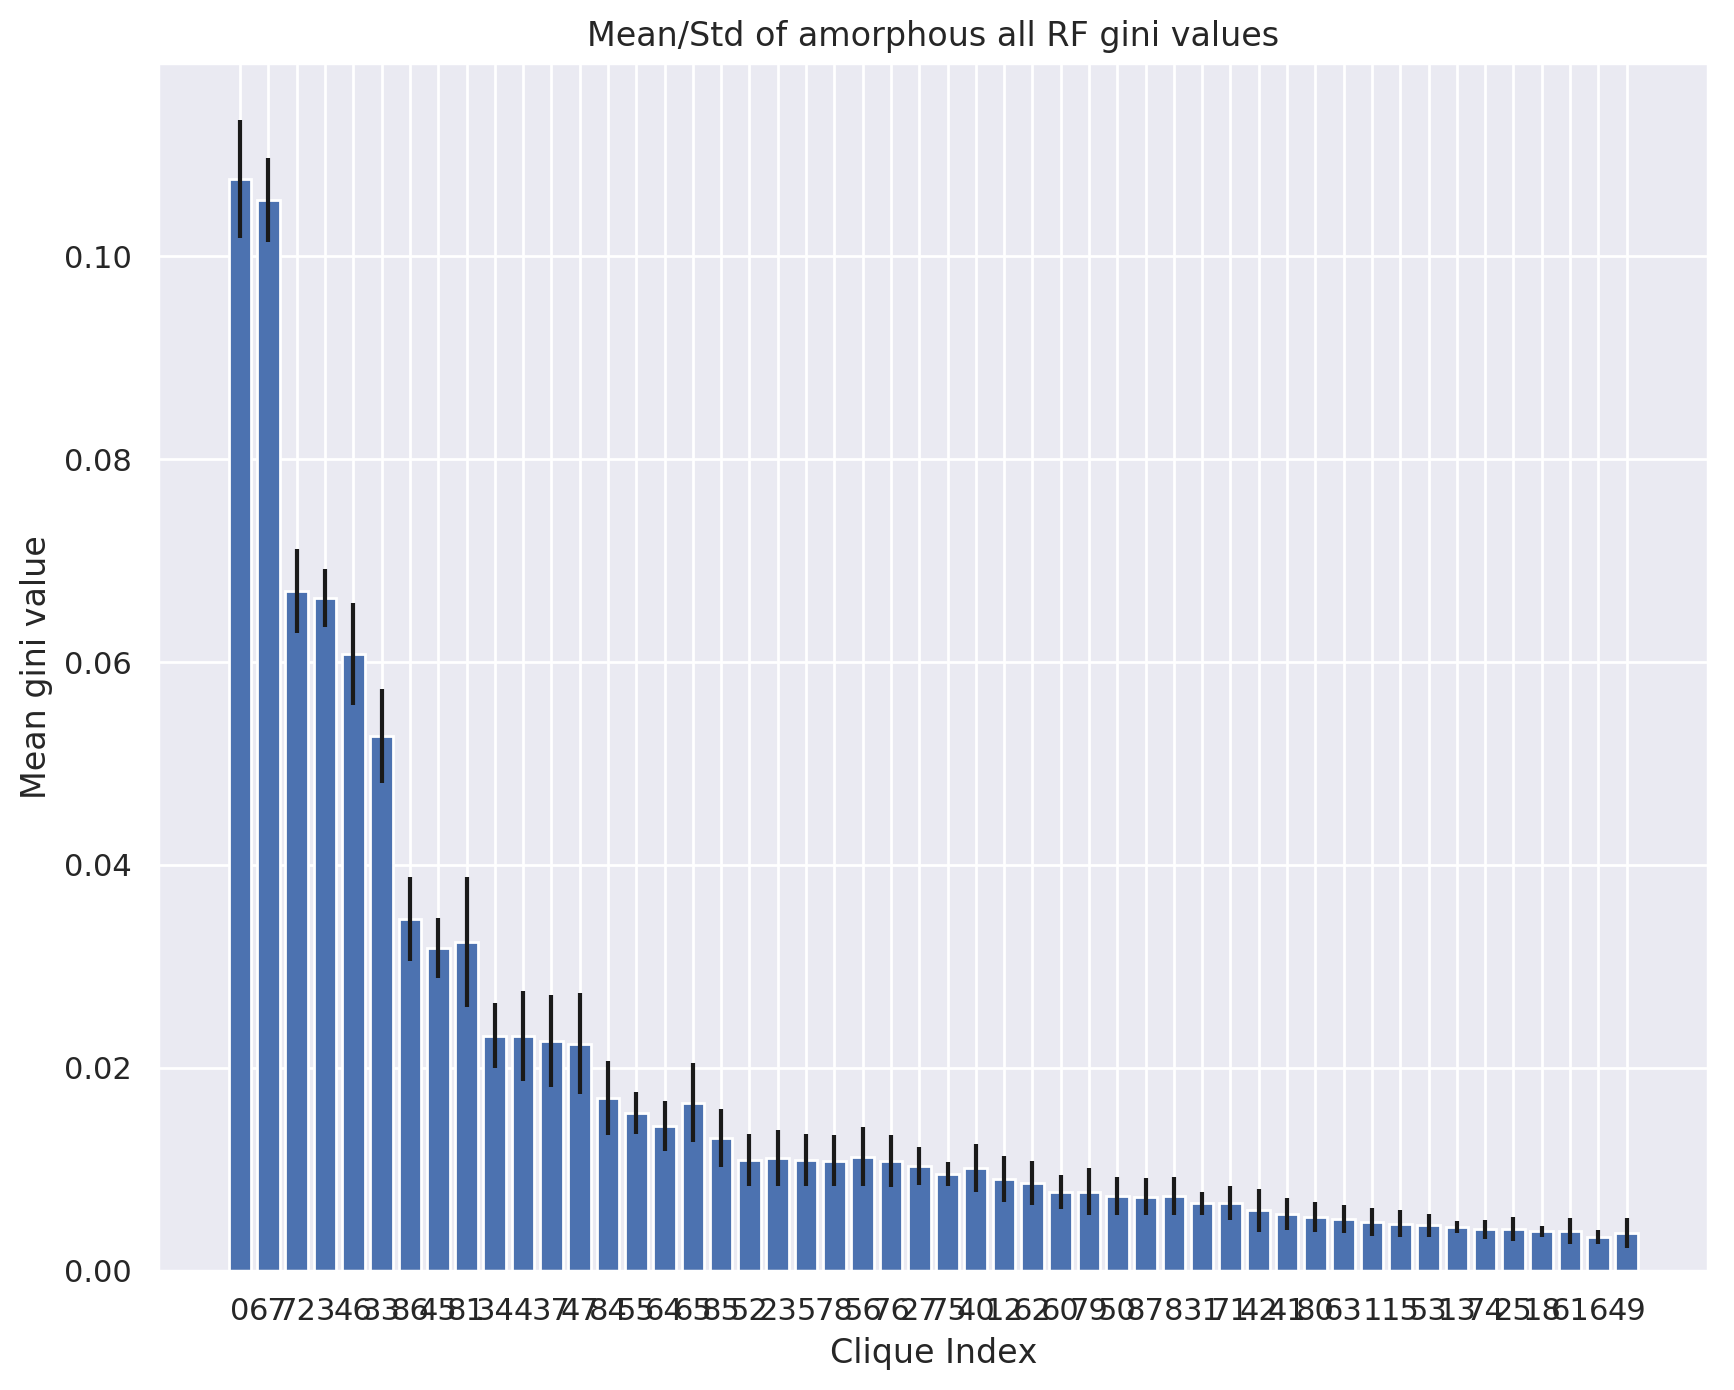

In [77]:
plot_gini(amo_max_gini_df20,'amorphous all')

### Filtered descriptors based on largest gini for LIPO (15, 40) and Amorphous (6, 13)

In [78]:
# Here we are grabbing the columns pertaining to the cliques we want for lipo
#clique_decomposition_lipo_scaled15=clique_decomposition_lipo_scaled[np.intersect1d(clique_decomposition_lipo_scaled.columns,lipo_rank_gini20[:15])]
#clique_decomposition_lipo_scaled40=clique_decomposition_lipo_scaled[np.intersect1d(clique_decomposition_lipo_scaled.columns,lipo_rank_gini20[:40])]

#pickle.dump(clique_decomposition_lipo_scaled15,open('./DESCRIPTORS/clique_decomposition_lipo_scaled15.pkl','wb'))
#pickle.dump(clique_decomposition_lipo_scaled40,open('./DESCRIPTORS/clique_decomposition_lipo_scaled40.pkl','wb'))

In [79]:
# clique_decomposition_amo_scaled6=clique_decomposition_amo_scaled[np.intersect1d(clique_decomposition_amo_scaled.columns,amo_rank_gini20[:6])]
# clique_decomposition_amo_scaled13=clique_decomposition_amo_scaled[np.intersect1d(clique_decomposition_amo_scaled.columns,amo_rank_gini20[:13])]
# pickle.dump(clique_decomposition_amo_scaled6,open('./DESCRIPTORS/clique_decomposition_amo_scaled6.pkl','wb'))
# pickle.dump(clique_decomposition_amo_scaled13,open('./DESCRIPTORS/clique_decomposition_amo_scaled13.pkl','wb'))

## Comparative analysis of the different descriptors

In [ ]:
# Getting Metrics 
lipo_sd_metrics = get_ave_metrics(lipo_sd_preds,name='lipo_sd')
lipo_cd_metrics = get_ave_metrics(lipo_cd_scaled_preds,name='lipo_cd')
lipo_cd_metrics15 = get_ave_metrics(lipo_cd_scaled_preds15,name='lipo_cd_15')
lipo_cd_metrics40 = get_ave_metrics(lipo_cd_scaled_preds40,name='lipo_cd_40')
lipo_wacsfs_metrics = get_ave_metrics(lipo_wacsfs_preds,name='lipo_wacsfs')
amo_sd_metrics = get_ave_metrics(amo_sd_preds,name='amo_sd')
amo_cd_metrics = get_ave_metrics(amo_cd_scaled_preds,name='amo_cd')
amo_cd_metrics6 = get_ave_metrics(amo_cd_scaled_preds6,name='amo_cd_6')
amo_cd_metrics13 = get_ave_metrics(amo_cd_scaled_preds13,name='amo_cd_13')
amo_wacsfs_metrics = get_ave_metrics(amo_wacsfs_preds,name='amo_wacsfs')

In [ ]:
metrics_df = pd.concat([lipo_sd_metrics,lipo_cd_metrics,lipo_wacsfs_metrics,
                       lipo_cd_metrics40,lipo_cd_metrics15,amo_sd_metrics,
                       amo_cd_metrics,amo_cd_metrics6,amo_cd_metrics13,amo_wacsfs_metrics],axis=1)